# CODER HOUSE
##Data Science II: Fundamentos para la Ciencia de Datos

#### Domingo 04/05/2025

#### Trabajo Final

#### Comisión 61725

#### Profesor Jorge Ruiz, tutor Luciano Lisachi


#### Patricio Emmanuel Dueñas

##Introduccion
-El data set sera formado usando la libreria de Python "LanusStasts" que recopila datos estadisticos de varios sitios web dedicados al Futbol.

-La idea en principio es armar un mecanismo por el cual se pueda predecir que jugador es el mejor reemplazo en una posicion determinada a la hora de hacer incorporaciones en un determinado plantel.

##Contexto de trabajo

Se simula formar parte del staff del club Boca jrs de Argentina, siendo la tarea a realizar encontrar el mejor reemplazante para la temporada entrante (2024) para la posicion de volante central()

A tener en cuenta que los clubes de futbol tienen un cierto rango de aspiracion a la hora de hacer incorporaciones, siendo el factor monetario totalmente limitante. Por eso motivo la seleccion de las ligas de Brasil, Mexico, USA y la propia de Argentina forman el conjunto de datos, mas exactamente para los torneos disputados en la temporada 2023.


#Hipotesis

La hipotesis es que al menos un algoritmo de aprendisaje no supervisado es capaz de encontrar el mejor refuerzo para una posicion especifica haciendo uso de informacion de temporadas pasadas.

#Diccionario



1.  fBref: Futbol reference, la pagina desde donde se scrapea la informacion.
2.  misc_TklW: Tackles ganados.
3.  misc_Fld: Faltas ganadas.
4.  defense_Int: Intecepciones defensivas.
5.  misc_Crs: Cambios de fente.
6.  shooting_Sh: Disparos totales.
7.  shooting_Gls: Disparos que fueron goles.
8.  stats_90s: Tiempo jugado por 90 minutos.
9.  passing_Cmp: Pases totales comletados.
10. passing_PrgDist: Distancia total de los pases progresivos.
11. passing_types_Att: Tipo de pases en funcion de ataque.
12. passing_types_Live: Tipo de pases vivos.
13. possession_Def Pen: Toques de la pelota en zona de penal.
14. possession_Mid 3rd: Toques de la pelota en zona de defensa 1/3.
15. defense_Def 3rd: Tackles en zona defensa 1/3.
14. defense_Mid 3rd: Tackles en zona medio 1/3.

Posiciones tacticas de los jugadores

GP: Arquero
DP: Defensores
MF: Mediocampistas
FW: Delanteros




### Importado de Librerias


In [329]:
pip install --upgrade LanusStats

In [330]:
import pandas as pd
import numpy as np
import seaborn as sns
import LanusStats as ls
import matplotlib.pyplot as plt

In [331]:
pd.set_option ('display.max_rows', 11)

## Formacion del data set

In [332]:
fbref = ls.Fbref()
ls.get_available_season_for_leagues ('Fbref', 'Primera Division Argentina')

{'id': 21,
 'slug': 'Primera-Division',
 'seasons': {'2021', '2022', '2023', '2024', '2025'}}

In [333]:
df= fbref.get_all_player_season_stats ('Primera Division Argentina','2023')

stats
Starting to scrape player data from Fbref...
keepers
Starting to scrape player data from Fbref...
keepersadv
Starting to scrape player data from Fbref...
shooting
Starting to scrape player data from Fbref...
passing
Starting to scrape player data from Fbref...
passing_types
Starting to scrape player data from Fbref...
gca
Starting to scrape player data from Fbref...
defense
Starting to scrape player data from Fbref...
possession
Starting to scrape player data from Fbref...
playingtime
Starting to scrape player data from Fbref...
misc
Starting to scrape player data from Fbref...


In [334]:
df_players = df[0]

In [335]:
df_players.head(8)

Player stats_Nation stats_Pos   stats_Squad  \
0       Ramón Ábila       ar ARG        FW         Colón   
1    Gonzalo Abrego       ar ARG        MF    Godoy Cruz   
2     Jonás Acevedo       ar ARG     MF,FW       Huracán   
3     Lucas Acevedo       ar ARG        DF         Colón   
4  Guillermo Acosta       ar ARG        MF  Atlé Tucumán   
5    Lautaro Acosta       ar ARG        MF         Lanús   
6      Lucas Acosta       ar ARG        GK         Lanús   
7     Tomás Adoryán       ar ARG        MF      Banfield   

                   stats_Comp stats_Age stats_Born stats_MP stats_Starts  \
0  Primera Division Argentina        33       1989       25           17   
1  Primera Division Argentina        23       2000       26           26   
2  Primera Division Argentina        25       1997       16           10   
3  Primera Division Argentina        31       1991        6            2   
4  Primera Division Argentina        34       1988       25           23   
5  Primera Division Argentina        34       1988       19           12   
6  Primera Division Argentina        27       1995       18           18   
7  Primera Division Argentina        21       2001        2            0   

  stats_Min  ... misc_Crs misc_Int misc_TklW misc_PKwon misc_PKcon misc_OG  \
0     1,571  ...        3        5         4          1          0       0   
1     2,134  ...       20       21        30          0          0       0   
2       849  ...       80        5         8          0          0       0   
3       189  ...        0        0         3          0          0       0   
4     1,874  ...       11       26        29          0          1       0   
5       932  ...       10        8        13          2          0       0   
6     1,620  ...        0        1         0          0          0       0   
7        39  ...        2        0         0          0          0       0   

  misc_Recov misc_Won misc_Lost misc_Won%  
0         28       12        19      38.7  
1        161       35        56      38.5  
2         47        6        14      30.0  
3         11       14         5      73.7  
4        166       28        24      53.8  
5         62       22        20      52.4  
6          8        1         1      50.0  
7          2        2         1      66.7  

[8 rows x 238 columns]

In [336]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Columns: 238 entries, Player to misc_Won%
dtypes: object(238)
memory usage: 1.5+ MB


In [337]:
df_players.shape

(825, 238)

In [338]:
df_players.describe()

Player stats_Nation stats_Pos  stats_Squad  \
count                 825          825       825          825   
unique                819           17        10           28   
top     Nicolás Fernández       ar ARG        DF  Racing Club   
freq                    2          698       235           36   

                        stats_Comp stats_Age stats_Born stats_MP stats_Starts  \
count                          825       825        825      825          825   
unique                           1        28         28       27           28   
top     Primera Division Argentina        22       2000        1            0   
freq                           825        75         85       67          116   

       stats_Min  ... misc_Crs misc_Int misc_TklW misc_PKwon misc_PKcon  \
count        825  ...      825      825       825        825        825   
unique       639  ...      104       52        53          4          3   
top        2,340  ...        0        0         0          0          0   
freq           9  ...      180      184       107        761        723   

       misc_OG misc_Recov misc_Won misc_Lost misc_Won%  
count      825        825      825       825       825  
unique       2        184       87        79       288  
top          0          1        0         0      50.0  
freq       806         32       95        94        54  

[4 rows x 238 columns]

In [339]:
df_players.isna().sum()

Player          0
stats_Nation    0
stats_Pos       0
stats_Squad     0
stats_Comp      0
               ..
misc_OG         0
misc_Recov      0
misc_Won        0
misc_Lost       0
misc_Won%       0
Length: 238, dtype: int64

In [340]:
ls.get_available_leagues('Fbref')

['Copa de la Liga',
 'Primera Division Argentina',
 'Primera Division Uruguay',
 'Brasileirao',
 'Brasileirao B',
 'Primera Division Colombia',
 'Primera Division Chile',
 'Primera Division Peru',
 'Primera Division Venezuela',
 'Primera Division Ecuador',
 'Primera Division Bolivia',
 'Primera Division Paraguay',
 'Brasileirao F',
 'MLS',
 'USL Championship',
 'Premier League',
 'La Liga',
 'Ligue 1',
 'Bundesliga',
 'Serie A',
 'Big 5 European Leagues',
 'Danish Superliga',
 'Eredivise',
 'Primeira Liga Portugal',
 'Copa America',
 'Euros',
 'Saudi League',
 'EFL Championship',
 'La Liga 2',
 'Belgian Pro League',
 'Challenger Pro League',
 '2. Bundesliga',
 'Ligue 2',
 'Serie B',
 'J1 League',
 'NSWL',
 'Wowens Super League',
 'Liga F',
 'Premier Division South Africa',
 'Champions League',
 'Europa League',
 'Conference League',
 'Copa Libertadores',
 'Liga MX']

In [341]:
fbref = ls.Fbref()
ls.get_available_season_for_leagues ('Fbref', 'Brasileirao')

{'id': 24,
 'slug': 'Serie-A',
 'seasons': {'2021', '2022', '2023', '2024', '2025'}}

In [342]:
df1= fbref.get_all_player_season_stats ('Brasileirao','2023')

stats
Starting to scrape player data from Fbref...
keepers
Starting to scrape player data from Fbref...
keepersadv
Starting to scrape player data from Fbref...
shooting
Starting to scrape player data from Fbref...
passing
Starting to scrape player data from Fbref...
passing_types
Starting to scrape player data from Fbref...
gca
Starting to scrape player data from Fbref...
defense
Starting to scrape player data from Fbref...
possession
Starting to scrape player data from Fbref...
playingtime
Starting to scrape player data from Fbref...
misc
Starting to scrape player data from Fbref...


In [343]:
df_players1= df1[0]

In [344]:
df_players1.head(8)

Player stats_Nation stats_Pos    stats_Squad   stats_Comp  \
0     Nicolás Acevedo       uy URU        MF          Bahia  Brasileirao   
1        Luiz Adriano       br BRA        FW  Internacional  Brasileirao   
2              Adriel       br BRA        GK         Grêmio  Brasileirao   
3           Adryelson       br BRA        DF  Botafogo (RJ)  Brasileirao   
4               Adson       br BRA     FW,MF    Corinthians  Brasileirao   
5              Adyson       br BRA     FW,MF   América (MG)  Brasileirao   
6  Washington Aguerre       uy URU        GK   América (MG)  Brasileirao   
7      Carlos Alberto       br BRA     FW,MF  Botafogo (RJ)  Brasileirao   

  stats_Age stats_Born stats_MP stats_Starts stats_Min  ... misc_Crs misc_Int  \
0        23       1999       31           21     1,970  ...       12       27   
1        35       1987       29           17     1,330  ...        0        9   
2        22       2001        2            2       180  ...        0        0   
3        24       1998       35           35     2,996  ...        0       61   
4        22       2000       15            9       857  ...       10        8   
5        17       2005        8            1       245  ...       31        5   
6        29       1993        2            2       180  ...        0        0   
7        20       2002       15            1       296  ...        5        1   

  misc_TklW misc_PKwon misc_PKcon misc_OG misc_Recov misc_Won misc_Lost  \
0        46          0          0       0        174       22        29   
1         7          0          0       0         30       25        33   
2         0          0          0       0          3        0         0   
3        20          0          0       0        127       92        45   
4        26          0          0       0         52        7         4   
5         5          0          0       0         16        0         0   
6         0          0          0       0          0        0         0   
7         0          1          0       0         14        4         7   

  misc_Won%  
0      43.1  
1      43.1  
2         0  
3      67.2  
4      63.6  
5         0  
6         0  
7      36.4  

[8 rows x 238 columns]

In [345]:
df_players1.shape

(748, 238)

In [346]:
ls.get_available_season_for_leagues('Fbref','MLS')

{'id': 22,
 'slug': 'Major-League-Soccer',
 'seasons': {'2021', '2022', '2023', '2024', '2025'}}

In [347]:
df2= fbref.get_all_player_season_stats ('MLS','2023')

stats
Starting to scrape player data from Fbref...
keepers
Starting to scrape player data from Fbref...
keepersadv
Starting to scrape player data from Fbref...
shooting
Starting to scrape player data from Fbref...
passing
Starting to scrape player data from Fbref...
passing_types
Starting to scrape player data from Fbref...
gca
Starting to scrape player data from Fbref...
defense
Starting to scrape player data from Fbref...
possession
Starting to scrape player data from Fbref...
playingtime
Starting to scrape player data from Fbref...
misc
Starting to scrape player data from Fbref...


In [348]:
df_players2= df2[0]

In [349]:
df_players2.shape

(855, 238)

In [350]:
fbref = ls.Fbref()
ls.get_available_season_for_leagues ('Fbref', 'Liga MX')

{'id': 31,
 'slug': 'Liga-MX',
 'seasons': {'2018-2019',
  '2019-2020',
  '2020-2021',
  '2021-2022',
  '2022-2023',
  '2023-2024',
  '2024-2025'}}

In [351]:
df3= fbref.get_all_player_season_stats ('Liga MX','2022-2023')

stats
Starting to scrape player data from Fbref...
keepers
Starting to scrape player data from Fbref...
keepersadv
Starting to scrape player data from Fbref...
shooting
Starting to scrape player data from Fbref...
passing
Starting to scrape player data from Fbref...
passing_types
Starting to scrape player data from Fbref...
gca
Starting to scrape player data from Fbref...
defense
Starting to scrape player data from Fbref...
possession
Starting to scrape player data from Fbref...
playingtime
Starting to scrape player data from Fbref...
misc
Starting to scrape player data from Fbref...


In [352]:
df_players3= df3[0]

In [353]:
df_players3.shape

(586, 238)

###Uniendo los datos de diferentes ligas se forma el dataframe final.


In [354]:
dfx = pd.concat([df_players, df_players1, df_players2,df_players3], ignore_index=True)
print(dfx)

                  Player stats_Nation stats_Pos   stats_Squad  \
0            Ramón Ábila       ar ARG        FW         Colón   
1         Gonzalo Abrego       ar ARG        MF    Godoy Cruz   
2          Jonás Acevedo       ar ARG     MF,FW       Huracán   
3          Lucas Acevedo       ar ARG        DF         Colón   
4       Guillermo Acosta       ar ARG        MF  Atlé Tucumán   
...                  ...          ...       ...           ...   
3009      Ángel Zaldívar       mx MEX        FW   Guadalajara   
3010      Edgar Zaldívar       mx MEX        MF         Atlas   
3011        Ángel Zapata       mx MEX        MF     Monterrey   
3012  Alejandro Zendejas       us USA     FW,MF       América   
3013         José Zúñiga       co COL        FW     Querétaro   

                      stats_Comp stats_Age stats_Born stats_MP stats_Starts  \
0     Primera Division Argentina        33       1989       25           17   
1     Primera Division Argentina        23       2000       2

In [355]:
list(dfx.columns)

['Player',
 'stats_Nation',
 'stats_Pos',
 'stats_Squad',
 'stats_Comp',
 'stats_Age',
 'stats_Born',
 'stats_MP',
 'stats_Starts',
 'stats_Min',
 'stats_90s',
 'stats_Gls',
 'stats_Ast',
 'stats_G+A',
 'stats_G-PK',
 'stats_PK',
 'stats_PKatt',
 'stats_CrdY',
 'stats_CrdR',
 'stats_xG',
 'stats_npxG',
 'stats_xAG',
 'stats_npxG+xAG',
 'stats_PrgC',
 'stats_PrgP',
 'stats_PrgR',
 'stats_Gls',
 'stats_Ast',
 'stats_G+A',
 'stats_G-PK',
 'stats_G+A-PK',
 'stats_xG',
 'stats_xAG',
 'stats_xG+xAG',
 'stats_npxG',
 'stats_npxG+xAG',
 'shooting_Nation',
 'shooting_Pos',
 'shooting_Squad',
 'shooting_Comp',
 'shooting_Age',
 'shooting_Born',
 'shooting_90s',
 'shooting_Gls',
 'shooting_Sh',
 'shooting_SoT',
 'shooting_SoT%',
 'shooting_Sh/90',
 'shooting_SoT/90',
 'shooting_G/Sh',
 'shooting_G/SoT',
 'shooting_Dist',
 'shooting_FK',
 'shooting_PK',
 'shooting_PKatt',
 'shooting_xG',
 'shooting_npxG',
 'shooting_npxG/Sh',
 'shooting_G-xG',
 'shooting_np:G-xG',
 'passing_Nation',
 'passing_Pos'

In [356]:
from google.colab import files

In [357]:
dfx.to_csv('mi_dataframe.csv', index=False)

In [358]:
dfx

Player stats_Nation stats_Pos   stats_Squad  \
0            Ramón Ábila       ar ARG        FW         Colón   
1         Gonzalo Abrego       ar ARG        MF    Godoy Cruz   
2          Jonás Acevedo       ar ARG     MF,FW       Huracán   
3          Lucas Acevedo       ar ARG        DF         Colón   
4       Guillermo Acosta       ar ARG        MF  Atlé Tucumán   
...                  ...          ...       ...           ...   
3009      Ángel Zaldívar       mx MEX        FW   Guadalajara   
3010      Edgar Zaldívar       mx MEX        MF         Atlas   
3011        Ángel Zapata       mx MEX        MF     Monterrey   
3012  Alejandro Zendejas       us USA     FW,MF       América   
3013         José Zúñiga       co COL        FW     Querétaro   

                      stats_Comp stats_Age stats_Born stats_MP stats_Starts  \
0     Primera Division Argentina        33       1989       25           17   
1     Primera Division Argentina        23       2000       26           26   
2     Primera Division Argentina        25       1997       16           10   
3     Primera Division Argentina        31       1991        6            2   
4     Primera Division Argentina        34       1988       25           23   
...                          ...       ...        ...      ...          ...   
3009                     Liga MX        28       1994       14           11   
3010                     Liga MX        25       1996       28           19   
3011                     Liga MX        21       2001        1            0   
3012                     Liga MX        24       1998       28           25   
3013                     Liga MX        28       1994       17           10   

     stats_Min  ... misc_Crs misc_Int misc_TklW misc_PKwon misc_PKcon misc_OG  \
0        1,571  ...        3        5         4          1          0       0   
1        2,134  ...       20       21        30          0          0       0   
2          849  ...       80        5         8          0          0       0   
3          189  ...        0        0         3          0          0       0   
4        1,874  ...       11       26        29          0          1       0   
...        ...  ...      ...      ...       ...        ...        ...     ...   
3009       761  ...        2        3         8          0          0       0   
3010     1,647  ...       10       20        18          0          0       0   
3011         1  ...        0        0         0          0          0       0   
3012     1,861  ...       90       20        26          0          0       0   
3013       984  ...        9        1         2          1          0       0   

     misc_Recov misc_Won misc_Lost misc_Won%  
0            28       12        19      38.7  
1           161       35        56      38.5  
2            47        6        14      30.0  
3            11       14         5      73.7  
4           166       28        24      53.8  
...         ...      ...       ...       ...  
3009         25       19        29      39.6  
3010         91       23        18      56.1  
3011          0        0         0         0  
3012        120       10        16      38.5  
3013         24       45        37      54.9  

[3014 rows x 238 columns]

In [359]:
Jug_duplicados = dfx[dfx.duplicated(subset='Player', keep=False)]                         #Identifico y ordeno los jugadores que figuran mas de una vez

print(Jug_duplicados)

                Player stats_Nation stats_Pos       stats_Squad  \
12    Emanuel Aguilera       ar ARG        DF             Tigre   
50         Julián Aude       ar ARG        DF             Lanús   
53        Tomás Avilés       ar ARG     DF,MF       Racing Club   
59       David Barbona       ar ARG     MF,FW    Defensa y Just   
86       Lucas Besozzi       ar ARG     MF,FW  Cen. Córdoba–SdE   
...                ...          ...       ...               ...   
3002           Vitinho       br BRA     FW,MF          Atlético   
3004    Facundo Waller       uy URU     FW,MF          Atlético   
3005    Facundo Waller       uy URU     MF,FW            Puebla   
3008    Ángel Zaldívar       mx MEX        FW          Atlético   
3009    Ángel Zaldívar       mx MEX        FW       Guadalajara   

                      stats_Comp stats_Age stats_Born stats_MP stats_Starts  \
12    Primera Division Argentina        33       1989       16           14   
50    Primera Division Argentina     

In [360]:
duplicados_ordenados = Jug_duplicados.sort_values(by='Player')

print(duplicados_ordenados)

              Player stats_Nation stats_Pos       stats_Squad  \
774     Agustín Urzi       ar ARG        MF          Banfield   
2976    Agustín Urzi       ar ARG     MF,FW         FC Juárez   
1072     Alan Franco       ar ARG        DF         São Paulo   
276      Alan Franco       ec ECU        MF          Talleres   
1071     Alan Franco       ec ECU     MF,FW  Atlético Mineiro   
...              ...          ...       ...               ...   
1438    Ángel Romero       py PAR        FW       Corinthians   
3008  Ángel Zaldívar       mx MEX        FW          Atlético   
3009  Ángel Zaldívar       mx MEX        FW       Guadalajara   
467   Ángelo Martino       ar ARG     DF,MF       Newell's OB   
468   Ángelo Martino       ar ARG        DF          Talleres   

                      stats_Comp stats_Age stats_Born stats_MP stats_Starts  \
774   Primera Division Argentina        22       2000        1            1   
2976                     Liga MX        22       2000       1

In [361]:
fila = dfx.iloc[694]
print(fila)

Player                      Carlos Sánchez
stats_Nation                        co COL
stats_Pos                            MF,DF
stats_Squad                    San Lorenzo
stats_Comp      Primera Division Argentina
                           ...            
misc_OG                                  0
misc_Recov                             105
misc_Won                                28
misc_Lost                               30
misc_Won%                             48.3
Name: 694, Length: 238, dtype: object


In [362]:
fila = dfx.iloc[2573]
print(fila)

Player          Diego De Buen
stats_Nation           mx MEX
stats_Pos               DF,MF
stats_Squad            Puebla
stats_Comp            Liga MX
                    ...      
misc_OG                     0
misc_Recov                175
misc_Won                   72
misc_Lost                  47
misc_Won%                60.5
Name: 2573, Length: 238, dtype: object


In [363]:
cantidad_repetidos = len(Jug_duplicados)

print(f"Cantidad de nombres repetidos: {cantidad_repetidos}")

Cantidad de nombres repetidos: 362


In [364]:
list(dfx.columns)

['Player',
 'stats_Nation',
 'stats_Pos',
 'stats_Squad',
 'stats_Comp',
 'stats_Age',
 'stats_Born',
 'stats_MP',
 'stats_Starts',
 'stats_Min',
 'stats_90s',
 'stats_Gls',
 'stats_Ast',
 'stats_G+A',
 'stats_G-PK',
 'stats_PK',
 'stats_PKatt',
 'stats_CrdY',
 'stats_CrdR',
 'stats_xG',
 'stats_npxG',
 'stats_xAG',
 'stats_npxG+xAG',
 'stats_PrgC',
 'stats_PrgP',
 'stats_PrgR',
 'stats_Gls',
 'stats_Ast',
 'stats_G+A',
 'stats_G-PK',
 'stats_G+A-PK',
 'stats_xG',
 'stats_xAG',
 'stats_xG+xAG',
 'stats_npxG',
 'stats_npxG+xAG',
 'shooting_Nation',
 'shooting_Pos',
 'shooting_Squad',
 'shooting_Comp',
 'shooting_Age',
 'shooting_Born',
 'shooting_90s',
 'shooting_Gls',
 'shooting_Sh',
 'shooting_SoT',
 'shooting_SoT%',
 'shooting_Sh/90',
 'shooting_SoT/90',
 'shooting_G/Sh',
 'shooting_G/SoT',
 'shooting_Dist',
 'shooting_FK',
 'shooting_PK',
 'shooting_PKatt',
 'shooting_xG',
 'shooting_npxG',
 'shooting_npxG/Sh',
 'shooting_G-xG',
 'shooting_np:G-xG',
 'passing_Nation',
 'passing_Pos'

In [365]:
                                                                                  # Cuento las repeticiones de nombres de columnas
repetidos = dfx.columns.value_counts()


repetidos = repetidos[repetidos > 1]

print(repetidos)

passing_Att     4
passing_Cmp%    4
passing_Cmp     4
stats_G+A       2
stats_npxG      2
               ..
defense_Tkl     2
gca_PassLive    2
gca_Sh          2
gca_Fld         2
gca_Def         2
Name: count, Length: 19, dtype: int64


In [366]:
passing_cols = dfx.loc[:, dfx.columns == 'passing_Att']
(passing_cols)


passing_Att passing_Att passing_Att passing_Att
0            319         156         101          19
1            851         365         308         129
2            448         200         137          76
3             70          29          30          10
4            925         373         387         113
...          ...         ...         ...         ...
3009         161          79          46           9
3010         770         316         297         123
3011           1           1           0           0
3012         944         431         341         119
3013         194          95          59           9

[3014 rows x 4 columns]

In [367]:
dfx = dfx.loc[:, ~dfx.columns.duplicated()]


print(dfx.columns.tolist())

['Player', 'stats_Nation', 'stats_Pos', 'stats_Squad', 'stats_Comp', 'stats_Age', 'stats_Born', 'stats_MP', 'stats_Starts', 'stats_Min', 'stats_90s', 'stats_Gls', 'stats_Ast', 'stats_G+A', 'stats_G-PK', 'stats_PK', 'stats_PKatt', 'stats_CrdY', 'stats_CrdR', 'stats_xG', 'stats_npxG', 'stats_xAG', 'stats_npxG+xAG', 'stats_PrgC', 'stats_PrgP', 'stats_PrgR', 'stats_G+A-PK', 'stats_xG+xAG', 'shooting_Nation', 'shooting_Pos', 'shooting_Squad', 'shooting_Comp', 'shooting_Age', 'shooting_Born', 'shooting_90s', 'shooting_Gls', 'shooting_Sh', 'shooting_SoT', 'shooting_SoT%', 'shooting_Sh/90', 'shooting_SoT/90', 'shooting_G/Sh', 'shooting_G/SoT', 'shooting_Dist', 'shooting_FK', 'shooting_PK', 'shooting_PKatt', 'shooting_xG', 'shooting_npxG', 'shooting_npxG/Sh', 'shooting_G-xG', 'shooting_np:G-xG', 'passing_Nation', 'passing_Pos', 'passing_Squad', 'passing_Comp', 'passing_Age', 'passing_Born', 'passing_90s', 'passing_Cmp', 'passing_Att', 'passing_Cmp%', 'passing_TotDist', 'passing_PrgDist', 'passi

In [368]:
                                                                                 # Cuento las repeticiones de nombres de columnas
repetidos = dfx.columns.value_counts()


repetidos = repetidos[repetidos > 1]

print(repetidos)

Series([], Name: count, dtype: int64)


In [369]:
dfx.shape

(3014, 213)

In [370]:
jugadores_duplicados = Jug_duplicados['Player'].unique()                          # Obtengo nombres únicos

In [371]:
dfx = dfx[~dfx['Player'].isin(jugadores_duplicados)]                              # Filtro para eliminar los jugadores duplicados


In [372]:
dfx.shape

(2652, 213)

In [373]:
tipos_datos = dfx.dtypes

print(tipos_datos)

Player          object
stats_Nation    object
stats_Pos       object
stats_Squad     object
stats_Comp      object
                 ...  
misc_OG         object
misc_Recov      object
misc_Won        object
misc_Lost       object
misc_Won%       object
Length: 213, dtype: object


In [374]:
print(dfx.isna().sum())

Player          0
stats_Nation    0
stats_Pos       0
stats_Squad     0
stats_Comp      0
               ..
misc_OG         0
misc_Recov      0
misc_Won        0
misc_Lost       0
misc_Won%       0
Length: 213, dtype: int64


In [375]:
columnas_NoC= ['Player','stats_Nation','stats_Pos','stats_Squad','stats_Comp']
columnas_AC = dfx.columns.difference(columnas_NoC)

                                                                                                             # Conversion de las columnas seleccionadas a numéricas
for col in columnas_AC:
    try:
        dfx[col] = pd.to_numeric(dfx[col], errors='coerce')
    except Exception as e:
        print(f"Error al convertir la columna '{col}': {e}")


dfx.dtypes

Player           object
stats_Nation     object
stats_Pos        object
stats_Squad      object
stats_Comp       object
                 ...   
misc_OG           int64
misc_Recov        int64
misc_Won          int64
misc_Lost         int64
misc_Won%       float64
Length: 213, dtype: object

In [376]:
(dfx.isna().sum())

Player          0
stats_Nation    0
stats_Pos       0
stats_Squad     0
stats_Comp      0
               ..
misc_OG         0
misc_Recov      0
misc_Won        0
misc_Lost       0
misc_Won%       0
Length: 213, dtype: int64

In [377]:
print("Cantidad total de valores NaN:", dfx.isna().sum().sum())

Cantidad total de valores NaN: 87243


In [378]:
dfx.dropna(axis=1, inplace=True)


In [379]:
(dfx.isna().sum())

Player          0
stats_Nation    0
stats_Pos       0
stats_Squad     0
stats_Comp      0
               ..
misc_OG         0
misc_Recov      0
misc_Won        0
misc_Lost       0
misc_Won%       0
Length: 179, dtype: int64

In [380]:
print("Cantidad total de valores NaN:", dfx.isna().sum().sum())

Cantidad total de valores NaN: 0


In [381]:
indices_to_string = [0,1,2,3,4]                                                          # Índices de columnas a convertir a tipo string


dfx.iloc[:, indices_to_string] = dfx.iloc[:, indices_to_string].astype(str)

In [382]:
dfx.dtypes

Player           object
stats_Nation     object
stats_Pos        object
stats_Squad      object
stats_Comp       object
                 ...   
misc_OG           int64
misc_Recov        int64
misc_Won          int64
misc_Lost         int64
misc_Won%       float64
Length: 179, dtype: object

## A continuacion estan los graficos

Text(0.5, 1.0, 'stats_90sxPlayer')

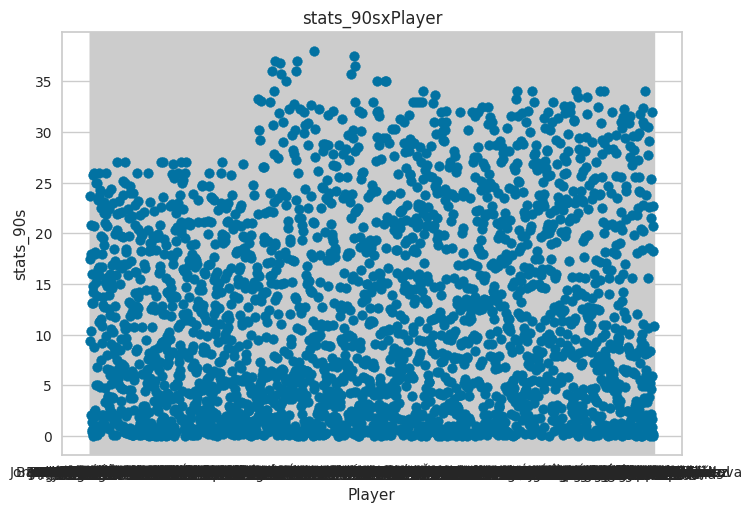

In [383]:
Mfig, ax = plt.subplots()
ax.scatter(data= dfx, x= 'Player', y= 'stats_90s')
ax.set_xlabel('Player')
ax.set_ylabel('stats_90s')
ax.set_title('stats_90sxPlayer')

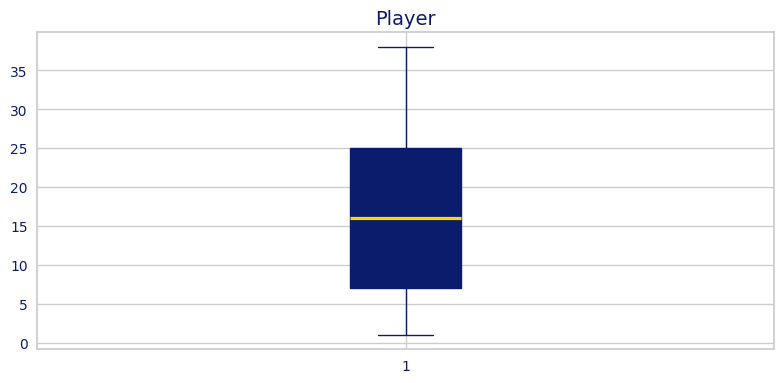

In [384]:
azul_boca = '#0B1C6D'
amarillo_boca = '#FFD700'

fig, ax = plt.subplots(figsize=(8, 4))                                                                      # Boxplot


ax.boxplot(dfx['stats_MP'], patch_artist=True,
           boxprops=dict(facecolor=azul_boca, color=azul_boca),
           capprops=dict(color=azul_boca),
           whiskerprops=dict(color=azul_boca),
           flierprops=dict(markerfacecolor=amarillo_boca, markeredgecolor=azul_boca),
           medianprops=dict(color=amarillo_boca, linewidth=2.3))


ax.set_title('Player', color=azul_boca, fontsize=14)
ax.tick_params(colors=azul_boca)

plt.tight_layout()
plt.show()

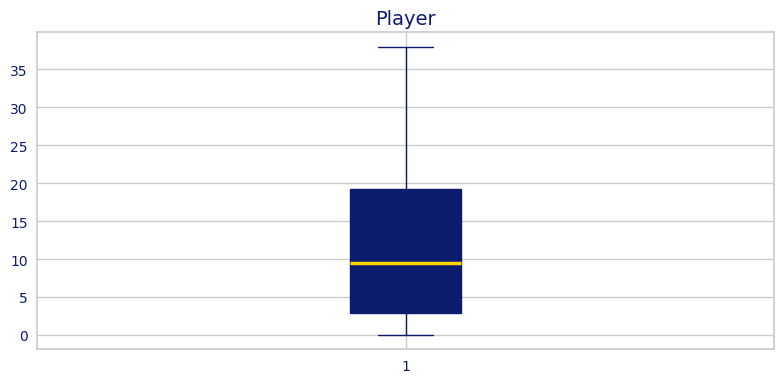

In [385]:

fig, ax = plt.subplots(figsize=(8, 4))                                                                      # Boxplot


ax.boxplot(dfx['stats_90s'], patch_artist=True,
           boxprops=dict(facecolor=azul_boca, color=azul_boca),
           capprops=dict(color=azul_boca),
           whiskerprops=dict(color=azul_boca),
           flierprops=dict(markerfacecolor=amarillo_boca, markeredgecolor=azul_boca),
           medianprops=dict(color=amarillo_boca, linewidth=2.5))


ax.set_title('Player', color=azul_boca, fontsize=14)
ax.tick_params(colors=azul_boca)

plt.tight_layout()
plt.show()

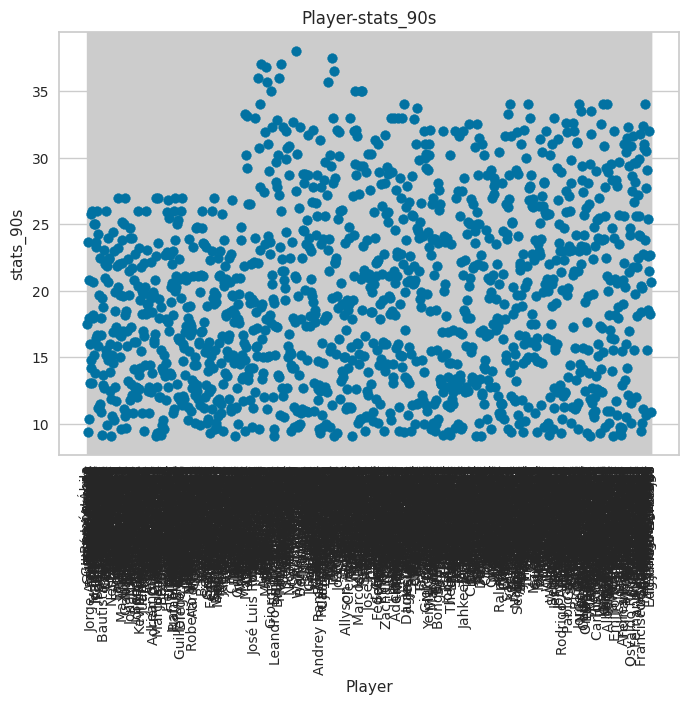

In [386]:
min_90s = 9                                                                                      # Aplico un filtro para sacar jugadores que participaron pocos minutos.
df_F90s = dfx[dfx['stats_90s'] > min_90s]


fig, ax = plt.subplots()
ax.scatter(data=df_F90s, x='Player', y='stats_90s')
ax.set_xlabel('Player')
ax.set_ylabel('stats_90s')
ax.set_title('Player-stats_90s')


plt.xticks(rotation=90)
plt.show()

In [387]:
df_F90s.shape

(1362, 179)

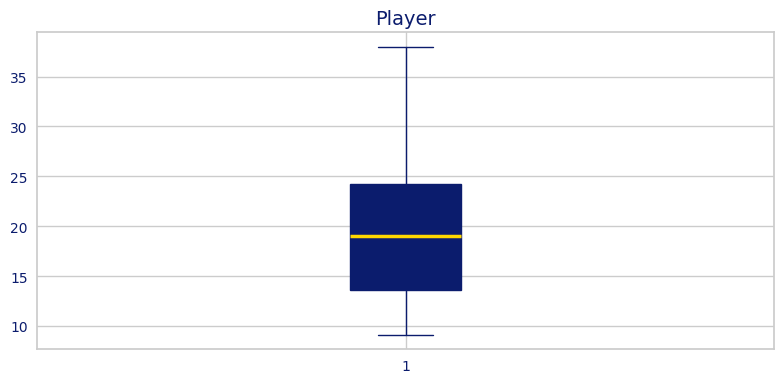

In [388]:
azul_boca = '#0B1C6D'
amarillo_boca = '#FFD700'


fig, ax = plt.subplots(figsize=(8, 4))


ax.boxplot(df_F90s['stats_90s'], patch_artist=True,
           boxprops=dict(facecolor=azul_boca, color=azul_boca),
           capprops=dict(color=azul_boca),
           whiskerprops=dict(color=azul_boca),
           flierprops=dict(markerfacecolor=amarillo_boca, markeredgecolor=azul_boca),
           medianprops=dict(color=amarillo_boca, linewidth=2.5))


ax.set_title('Player', color=azul_boca, fontsize=14)
ax.tick_params(colors=azul_boca)

plt.tight_layout()
plt.show()

<Axes: xlabel='stats_90s', ylabel='Count'>

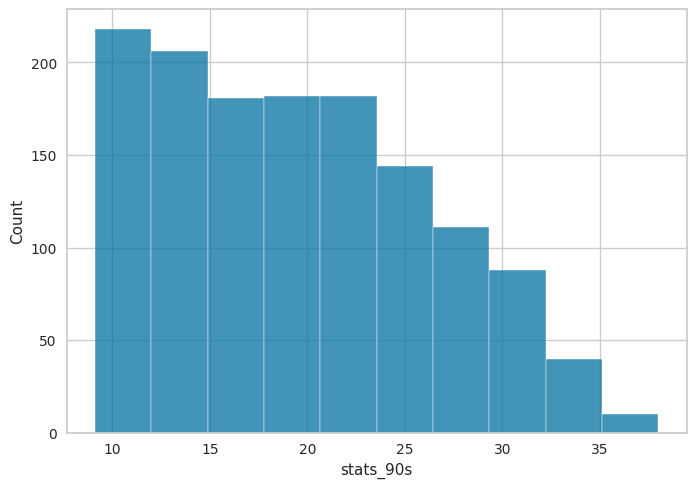

In [462]:
sns.histplot(data=df_F90s, x='stats_90s',bins=10)

Text(0, 0.5, 'passing_Cmp')

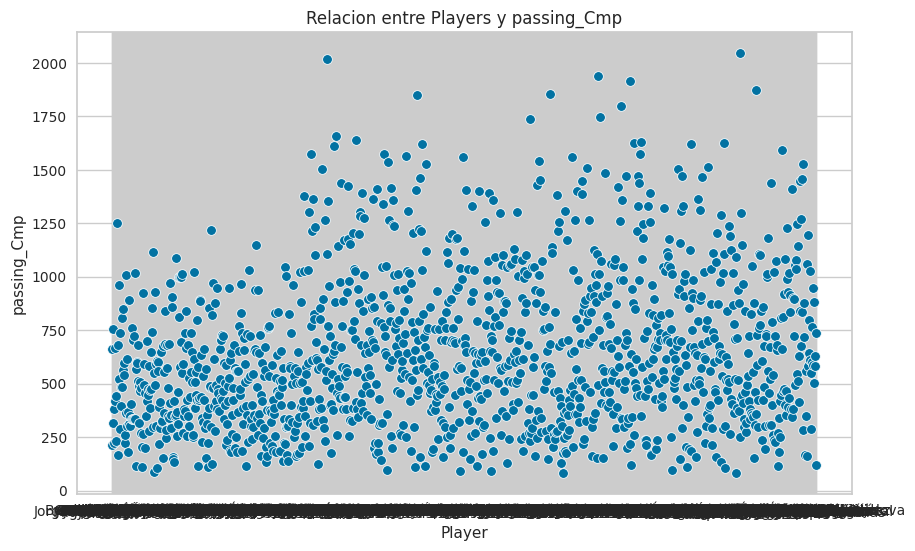

In [389]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(x='Player', y= 'passing_Cmp',data=df_F90s)
plt.title('Relacion entre Players y passing_Cmp')
plt.xlabel('Player')
plt.ylabel('passing_Cmp')

<Axes: xlabel='passing_Cmp', ylabel='Count'>

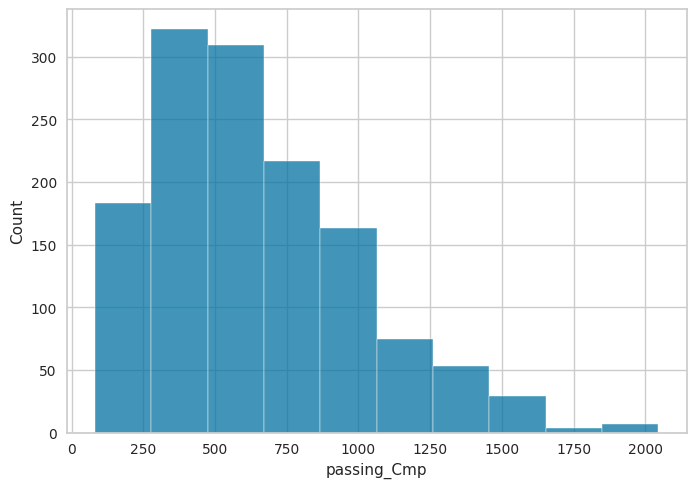

In [461]:
sns.histplot(data=df_F90s, x='passing_Cmp',bins=10)

In [390]:
df_F90s['passing_Cmp'].mean()

np.float64(643.9221732745962)

In [391]:
df_F90s['stats_90s'].mean()

np.float64(19.49581497797357)

In [392]:
df_F90s['stats_90s'].quantile(0.25)

np.float64(13.6)

In [393]:
df_F90s['stats_MP'].quantile(0.25)

np.float64(20.0)

In [394]:
df_F90s['stats_90s'].describe()

count    1362.000000
mean       19.495815
std         6.823126
min         9.100000
25%        13.600000
50%        19.000000
75%        24.275000
max        38.000000
Name: stats_90s, dtype: float64

In [395]:
df_F90s['stats_90s'].describe()

count    1362.000000
mean       19.495815
std         6.823126
min         9.100000
25%        13.600000
50%        19.000000
75%        24.275000
max        38.000000
Name: stats_90s, dtype: float64

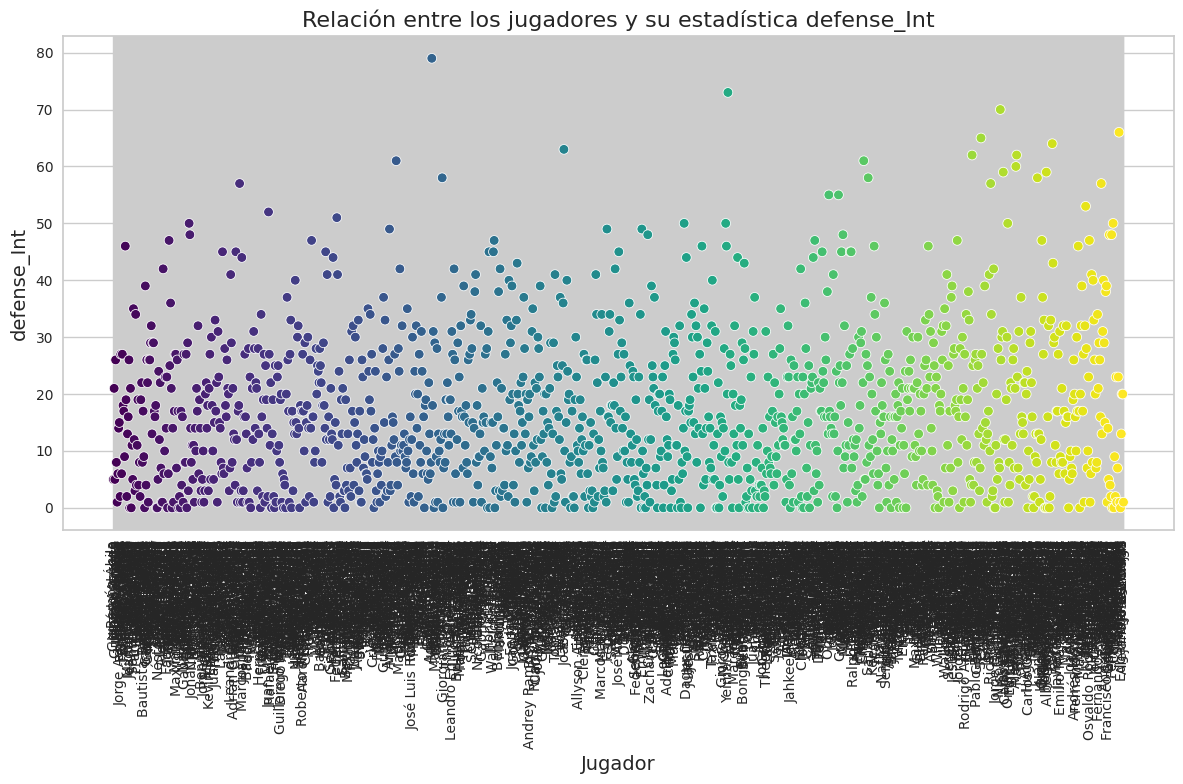

In [454]:
sns.set_style('whitegrid')

plt.figure(figsize=(12, 8))

sns.scatterplot(x='Player', y='defense_Int', data=df_F90s, hue='Player', palette='viridis', legend=None)

plt.title('Relación entre los jugadores y su estadística defense_Int', fontsize=16)
plt.xlabel('Jugador', fontsize=14)
plt.ylabel('defense_Int', fontsize=14)


plt.xticks(rotation=90)

plt.tight_layout()


plt.show()

<Axes: xlabel='defense_Int', ylabel='Count'>

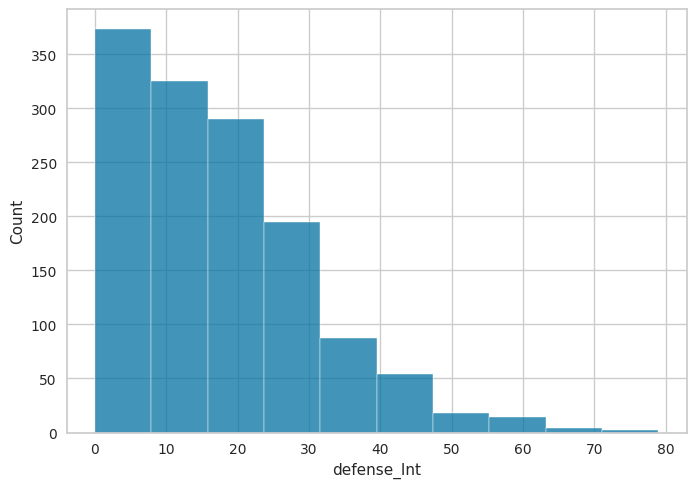

In [458]:
sns.histplot(data=df_F90s, x='defense_Int',bins=10)

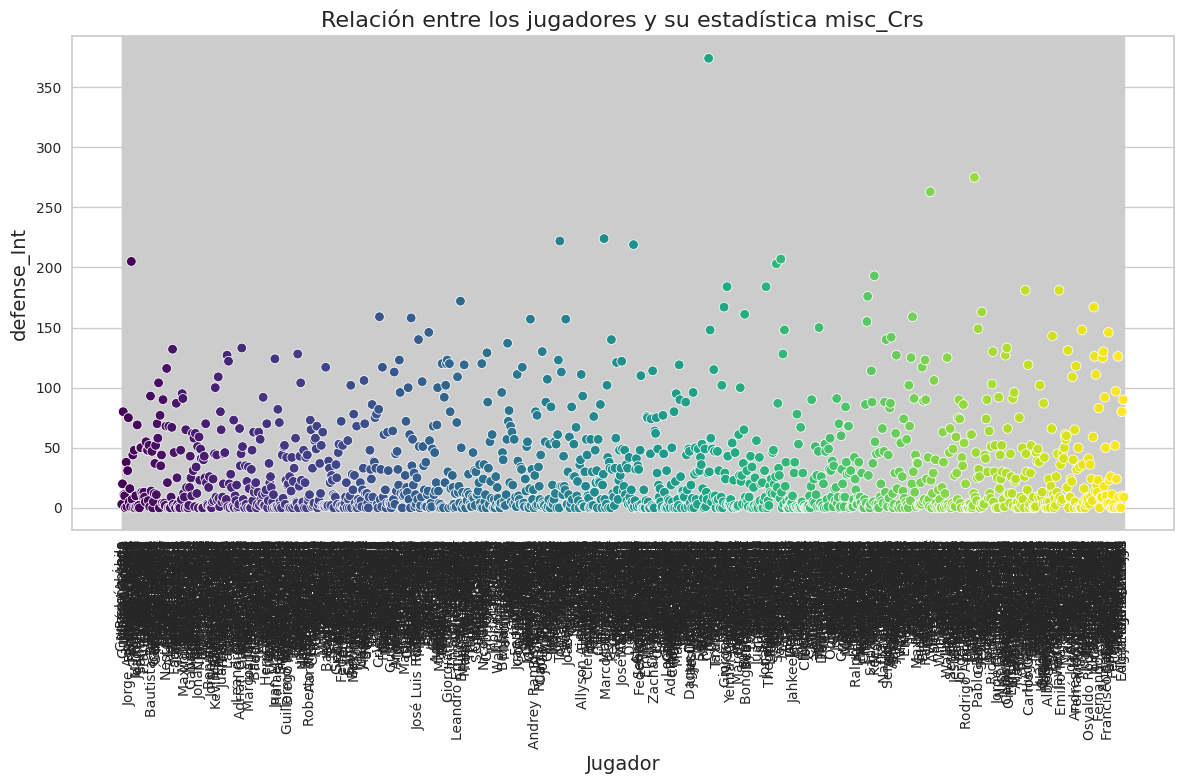

In [457]:
sns.set_style('whitegrid')

plt.figure(figsize=(12, 8))

sns.scatterplot(x='Player', y='misc_Crs', data=df_F90s, hue='Player', palette='viridis', legend=None)

plt.title('Relación entre los jugadores y su estadística misc_Crs', fontsize=16)
plt.xlabel('Jugador', fontsize=14)
plt.ylabel('defense_Int', fontsize=14)


plt.xticks(rotation=90)

plt.tight_layout()


plt.show()

<Axes: xlabel='misc_Crs', ylabel='Count'>

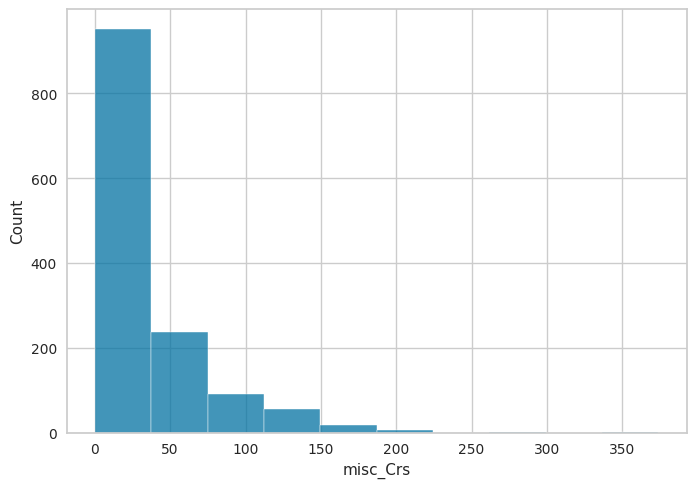

In [456]:
sns.histplot(data=df_F90s, x='misc_Crs',bins=10)

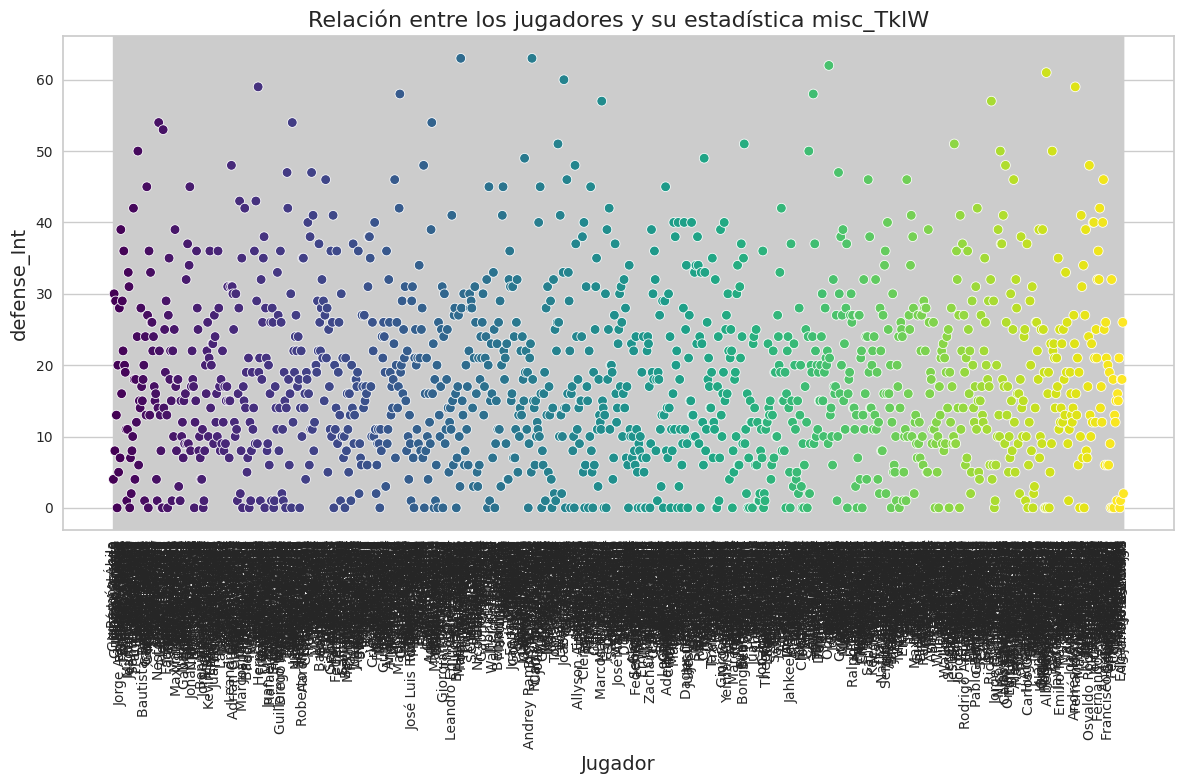

In [459]:
sns.set_style('whitegrid')

plt.figure(figsize=(12, 8))

sns.scatterplot(x='Player', y='misc_TklW', data=df_F90s, hue='Player', palette='viridis', legend=None)

plt.title('Relación entre los jugadores y su estadística misc_TklW', fontsize=16)
plt.xlabel('Jugador', fontsize=14)
plt.ylabel('defense_Int', fontsize=14)


plt.xticks(rotation=90)

plt.tight_layout()


plt.show()

<Axes: xlabel='misc_TklW', ylabel='Count'>

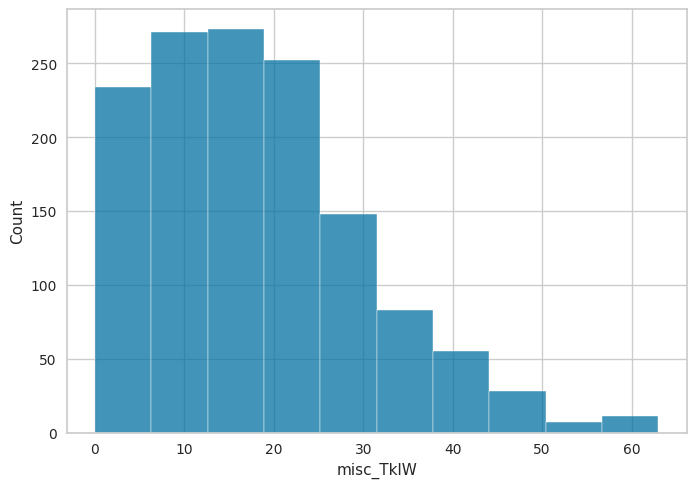

In [460]:
sns.histplot(data=df_F90s, x='misc_TklW',bins=10)

##Outliers
Como era esperable se nota la presencia de outliers ya que en algunas estadisticas, como por ejemplo en cambios de frente o takles ganados, no son muchos los jugadores que destacan. Esto va de la mano con la distribucion sesgada a la derecha que presentan algunas de las variables seleccionadas, demostrando que la menor cantidad de jugadores se queda con las estadisticas mas altas en algunos casos, siendo otros mas parejo. Tambien por otro ejemplo son los arqueros que suelen jugar la mayor cantidad de minutos y no son reemplazados casi nunca. Como refuerzo para la exploracion se aplica un filtro para dejar afuera a jugadores que participaron de pocos minutos durante la temporada.

In [396]:
df_F90s.shape

(1362, 179)

In [397]:
correlation_matrixP = df_F90s[['stats_Gls', 'stats_Ast', 'stats_G+A']].corr(method='pearson')
correlation_matrixP

stats_Gls  stats_Ast  stats_G+A
stats_Gls   1.000000   0.485895   0.923694
stats_Ast   0.485895   1.000000   0.783682
stats_G+A   0.923694   0.783682   1.000000

In [398]:
correlation_matrix = df_F90s[['stats_Gls', 'stats_Ast', 'stats_G+A']].corr(method='spearman')
correlation_matrix

stats_Gls  stats_Ast  stats_G+A
stats_Gls   1.000000   0.461156   0.874417
stats_Ast   0.461156   1.000000   0.800137
stats_G+A   0.874417   0.800137   1.000000

In [399]:
correlation_matrix1 = df_F90s[['shooting_Gls', 'shooting_Sh', 'shooting_Dist']].corr(method='spearman')
correlation_matrix1

shooting_Gls  shooting_Sh  shooting_Dist
shooting_Gls       1.000000     0.770389       0.045247
shooting_Sh        0.770389     1.000000       0.281408
shooting_Dist      0.045247     0.281408       1.000000

In [400]:
correlation_matrix2 = df_F90s[['passing_types_Att','passing_types_Live','passing_types_Dead']].corr(method='pearson')
correlation_matrix2

passing_types_Att  passing_types_Live  passing_types_Dead
passing_types_Att            1.000000            0.976193            0.438610
passing_types_Live           0.976193            1.000000            0.233313
passing_types_Dead           0.438610            0.233313            1.000000

In [401]:
correlation_matrix3 = df_F90s[['passing_Cmp','passing_types_Live','passing_types_Dead','misc_Crs']].corr(method='spearman')
correlation_matrix3

passing_Cmp  passing_types_Live  passing_types_Dead  \
passing_Cmp            1.000000            0.979217            0.464395   
passing_types_Live     0.979217            1.000000            0.364927   
passing_types_Dead     0.464395            0.364927            1.000000   
misc_Crs               0.098018            0.157713            0.270662   

                    misc_Crs  
passing_Cmp         0.098018  
passing_types_Live  0.157713  
passing_types_Dead  0.270662  
misc_Crs            1.000000

In [402]:
correlation_matrix4 = df_F90s[['passing_Cmp','passing_types_Live','passing_types_Dead','misc_Crs']].corr(method='pearson')
correlation_matrix4

passing_Cmp  passing_types_Live  passing_types_Dead  \
passing_Cmp            1.000000            0.985033            0.334764   
passing_types_Live     0.985033            1.000000            0.233313   
passing_types_Dead     0.334764            0.233313            1.000000   
misc_Crs               0.187738            0.215144            0.359714   

                    misc_Crs  
passing_Cmp         0.187738  
passing_types_Live  0.215144  
passing_types_Dead  0.359714  
misc_Crs            1.000000

In [403]:
correlation_matrix5 = df_F90s[['possession_Def Pen','possession_Mid 3rd','defense_Def 3rd','misc_TklW']].corr(method='spearman')
correlation_matrix5

possession_Def Pen  possession_Mid 3rd  defense_Def 3rd  \
possession_Def Pen            1.000000            0.145573         0.291168   
possession_Mid 3rd            0.145573            1.000000         0.698687   
defense_Def 3rd               0.291168            0.698687         1.000000   
misc_TklW                     0.069064            0.731052         0.882615   

                    misc_TklW  
possession_Def Pen   0.069064  
possession_Mid 3rd   0.731052  
defense_Def 3rd      0.882615  
misc_TklW            1.000000

In [404]:
correlation_matrix6 = df_F90s[['passing_Ast', 'passing_1/3','possession_Def Pen','possession_Mid 3rd','possession_Att 3rd','misc_TklW']].corr(method='pearson')
correlation_matrix6

passing_Ast  passing_1/3  possession_Def Pen  \
passing_Ast            1.000000     0.316930           -0.279946   
passing_1/3            0.316930     1.000000           -0.189720   
possession_Def Pen    -0.279946    -0.189720            1.000000   
possession_Mid 3rd     0.289453     0.909812           -0.319318   
possession_Att 3rd     0.733017     0.368085           -0.446078   
misc_TklW              0.157947     0.562725           -0.316984   

                    possession_Mid 3rd  possession_Att 3rd  misc_TklW  
passing_Ast                   0.289453            0.733017   0.157947  
passing_1/3                   0.909812            0.368085   0.562725  
possession_Def Pen           -0.319318           -0.446078  -0.316984  
possession_Mid 3rd            1.000000            0.360712   0.690517  
possession_Att 3rd            0.360712            1.000000   0.303041  
misc_TklW                     0.690517            0.303041   1.000000

In [405]:
correlation_matrix7 = df_F90s[['passing_TotDist', 'passing_PrgDist', 'passing_Ast', 'passing_1/3','possession_Def Pen','possession_Mid 3rd','possession_Att 3rd','stats_Gls', 'stats_Ast', 'stats_G+A']].corr(method='spearman')
correlation_matrix7

passing_TotDist  passing_PrgDist  passing_Ast  \
passing_TotDist            1.000000         0.919678    -0.009341   
passing_PrgDist            0.919678         1.000000    -0.171520   
passing_Ast               -0.009341        -0.171520     1.000000   
passing_1/3                0.673958         0.480456     0.285601   
possession_Def Pen         0.645242         0.795964    -0.429775   
possession_Mid 3rd         0.696024         0.471838     0.278517   
possession_Att 3rd        -0.102799        -0.301938     0.689256   
stats_Gls                 -0.215496        -0.375403     0.461156   
stats_Ast                 -0.009341        -0.171520     1.000000   
stats_G+A                 -0.155585        -0.345034     0.800137   

                    passing_1/3  possession_Def Pen  possession_Mid 3rd  \
passing_TotDist        0.673958            0.645242            0.696024   
passing_PrgDist        0.480456            0.795964            0.471838   
passing_Ast            0.285601           -0.429775            0.278517   
passing_1/3            1.000000            0.090095            0.925897   
possession_Def Pen     0.090095            1.000000            0.145573   
possession_Mid 3rd     0.925897            0.145573            1.000000   
possession_Att 3rd     0.371961           -0.623633            0.363930   
stats_Gls              0.052199           -0.489695            0.083107   
stats_Ast              0.285601           -0.429775            0.278517   
stats_G+A              0.178602           -0.546282            0.196835   

                    possession_Att 3rd  stats_Gls  stats_Ast  stats_G+A  
passing_TotDist              -0.102799  -0.215496  -0.009341  -0.155585  
passing_PrgDist              -0.301938  -0.375403  -0.171520  -0.345034  
passing_Ast                   0.689256   0.461156   1.000000   0.800137  
passing_1/3                   0.371961   0.052199   0.285601   0.178602  
possession_Def Pen           -0.623633  -0.489695  -0.429775  -0.546282  
possession_Mid 3rd            0.363930   0.083107   0.278517   0.196835  
possession_Att 3rd            1.000000   0.572388   0.689256   0.735942  
stats_Gls                     0.572388   1.000000   0.461156   0.874417  
stats_Ast                     0.689256   0.461156   1.000000   0.800137  
stats_G+A                     0.735942   0.874417   0.800137   1.000000

In [453]:
dfx[['shooting_Gls','shooting_Sh','passing_Cmp','passing_PrgDist','passing_types_Att','passing_types_Live','possession_Def Pen','possession_Mid 3rd','defense_Def 3rd','defense_Mid 3rd','misc_TklW','misc_Crs']]

shooting_Gls  shooting_Sh  passing_Cmp  passing_PrgDist  \
0         1.922588     0.898568    -0.430891        -0.637118   
1         0.701342     0.955631     0.747628         0.305510   
2        -0.519905     0.042625    -0.156694        -0.298050   
3        -0.519905    -0.642130    -0.842186        -0.651913   
4        -0.519905     0.270877     0.995460         0.634011   
...            ...          ...          ...              ...   
3007     -0.519905    -0.756255    -0.992467        -0.808011   
3010     -0.519905    -0.356815     0.671169        -0.026614   
3011     -0.519905    -0.756255    -0.992467        -0.808011   
3012      2.736752     2.439266     0.955912         0.232745   
3013      0.294260     1.126820    -0.676086        -0.724376   

      passing_types_Att  passing_types_Live  possession_Def Pen  \
0             -0.358145           -0.353555           -0.347362   
1              0.790159            0.984008           -0.237641   
2             -0.079703           -0.161789           -0.422795   
3             -0.895603           -0.868924           -0.230783   
4              0.949886            1.118244           -0.066202   
...                 ...                 ...                 ...   
3007          -1.044538           -1.029527           -0.422795   
3010           0.615323            0.756287           -0.196495   
3011          -1.044538           -1.029527           -0.429653   
3012           0.990897            1.015170           -0.361077   
3013          -0.627954           -0.583673           -0.361077   

      possession_Mid 3rd  defense_Def 3rd  defense_Mid 3rd  misc_TklW  \
0              -0.311723        -0.837672        -0.634890  -0.584561   
1               1.428837         0.762332         2.387745   1.640728   
2              -0.014723        -0.437671         0.090542  -0.242209   
3              -0.857375        -0.437671        -0.876701  -0.670149   
4               1.446105         1.262333         0.815975   1.555140   
...                  ...              ...              ...        ...   
3007           -0.950619        -0.837672        -0.634890  -0.755737   
3010            1.235441         0.062330         1.541407   0.613671   
3011           -0.954073        -0.837672        -0.755795  -0.926913   
3012            0.917720         0.362331         1.420502   1.298376   
3013           -0.512026        -0.837672        -0.755795  -0.755737   

      misc_Crs  
0    -0.487689  
1     0.032393  
2     1.867975  
3    -0.579468  
4    -0.242945  
...        ...  
3007 -0.579468  
3010 -0.273538  
3011 -0.579468  
3012  2.173905  
3013 -0.304131  

[2652 rows x 12 columns]

In [408]:
Est_selecionadas = ['shooting_Gls','shooting_Sh','passing_Cmp','passing_PrgDist','passing_types_Att','passing_types_Live','possession_Def Pen','possession_Mid 3rd','defense_Def 3rd','defense_Mid 3rd','misc_TklW','misc_Crs']

In [409]:
dfx[Est_selecionadas]

shooting_Gls  shooting_Sh  passing_Cmp  passing_PrgDist  \
0                6           29          213              566   
1                3           30          660             3688   
2                0           14          317             1689   
3                0            2           57              517   
4                0           18          754             4776   
...            ...          ...          ...              ...   
3007             0            0            0                0   
3010             0            7          631             2588   
3011             0            0            0                0   
3012             8           56          739             3447   
3013             2           33          120              277   

      passing_types_Att  passing_types_Live  possession_Def Pen  \
0                   319                 283                  12   
1                   851                 841                  28   
2                   448                 363                   1   
3                    70                  68                  29   
4                   925                 897                  53   
...                 ...                 ...                 ...   
3007                  1                   1                   1   
3010                770                 746                  34   
3011                  1                   1                   0   
3012                944                 854                  10   
3013                194                 187                  10   

      possession_Mid 3rd  defense_Def 3rd  defense_Mid 3rd  misc_TklW  \
0                    187                0                2          4   
1                    691               16               27         30   
2                    273                4                8          8   
3                     29                4                0          3   
4                    696               21               14         29   
...                  ...              ...              ...        ...   
3007                   2                0                2          2   
3010                 635                9               20         18   
3011                   1                0                1          0   
3012                 543               12               19         26   
3013                 129                0                1          2   

      misc_Crs  
0            3  
1           20  
2           80  
3            0  
4           11  
...        ...  
3007         0  
3010        10  
3011         0  
3012        90  
3013         9  

[2652 rows x 12 columns]

In [410]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch

In [411]:
scaler= StandardScaler()

columns_to_scale = Est_selecionadas
dfx[columns_to_scale] = scaler.fit_transform(dfx[columns_to_scale])

In [412]:
X = df_F90s[Est_selecionadas].values

In [413]:
df_estadarizado = pd.DataFrame(X, columns=Est_selecionadas)

In [414]:
df_estadarizado.to_csv('df_estandarizado.csv', index=False)

files.download('df_estandarizado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [415]:
df_F90s[Est_selecionadas]

shooting_Gls  shooting_Sh  passing_Cmp  passing_PrgDist  \
0                6           29          213              566   
1                3           30          660             3688   
2                0           14          317             1689   
4                0           18          754             4776   
5                0           11          222             1053   
...            ...          ...          ...              ...   
3003             3            2          881            20721   
3006             0           42          583             2507   
3010             0            7          631             2588   
3012             8           56          739             3447   
3013             2           33          120              277   

      passing_types_Att  passing_types_Live  possession_Def Pen  \
0                   319                 283                  12   
1                   851                 841                  28   
2                   448                 363                   1   
4                   925                 897                  53   
5                   296                 284                  12   
...                 ...                 ...                 ...   
3003               1184                 868                1106   
3006                774                 735                  22   
3010                770                 746                  34   
3012                944                 854                  10   
3013                194                 187                  10   

      possession_Mid 3rd  defense_Def 3rd  defense_Mid 3rd  misc_TklW  \
0                    187                0                2          4   
1                    691               16               27         30   
2                    273                4                8          8   
4                    696               21               14         29   
5                    232                6                9         13   
...                  ...              ...              ...        ...   
3003                   9                1                0          1   
3006                 454                9               17         18   
3010                 635                9               20         18   
3012                 543               12               19         26   
3013                 129                0                1          2   

      misc_Crs  
0            3  
1           20  
2           80  
4           11  
5           10  
...        ...  
3003         0  
3006        80  
3010        10  
3012        90  
3013         9  

[1362 rows x 12 columns]

In [416]:
corr_matrix = df_F90s[Est_selecionadas].corr()

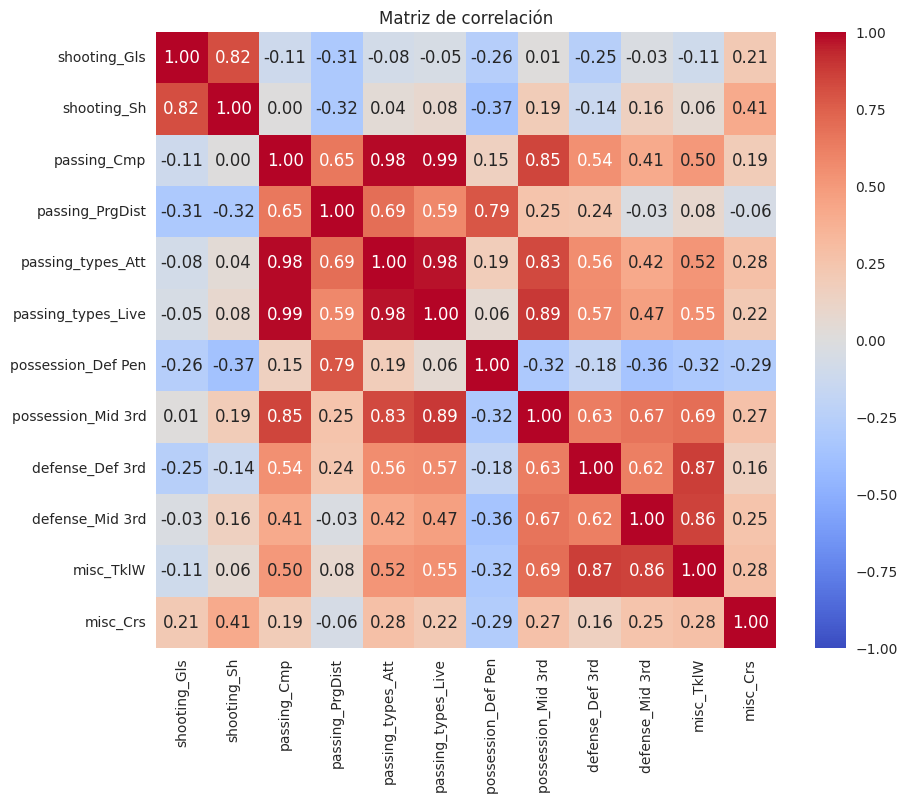

In [417]:
plt.figure(figsize=(10, 8))  # Ajustar el tamaño si es necesario
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Mostrar el gráfico
plt.title('Matriz de correlación')
plt.show()

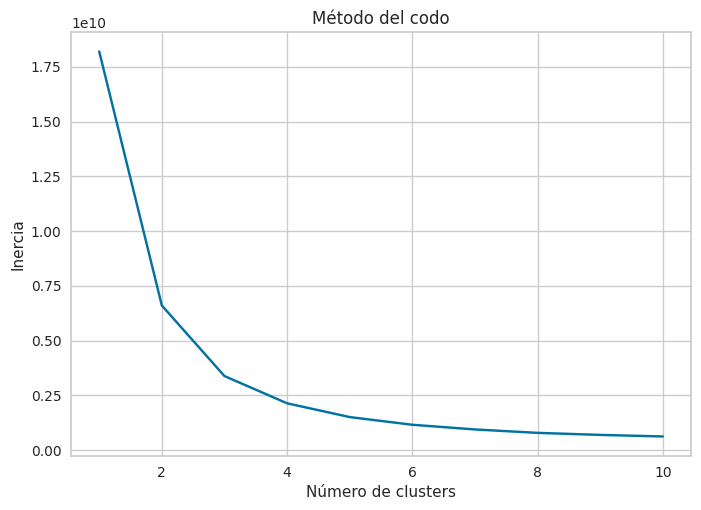

In [418]:
wcss = []                                                                                                                              # wcss
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

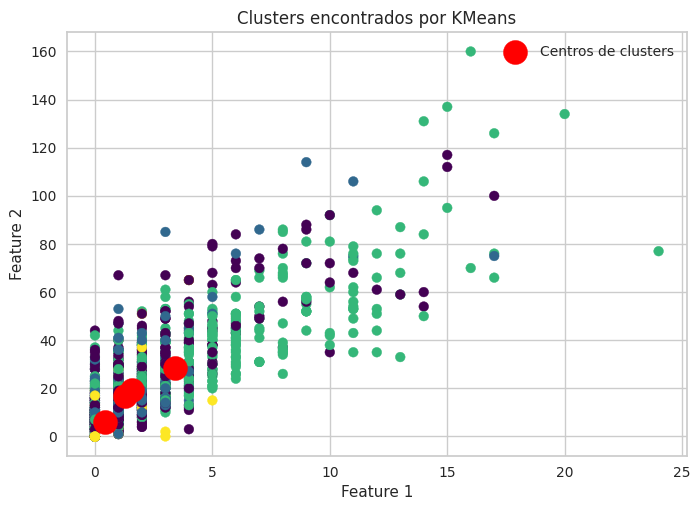

In [419]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)                                              #KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)




plt.scatter(X[:, 0], X[:, 1], c=pred_y, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centros de clusters')
plt.title('Clusters encontrados por KMeans')
plt.xlabel('Columna 1')
plt.ylabel('Columna 2')
plt.legend()



plt.title('Clusters encontrados por KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
plt.show()

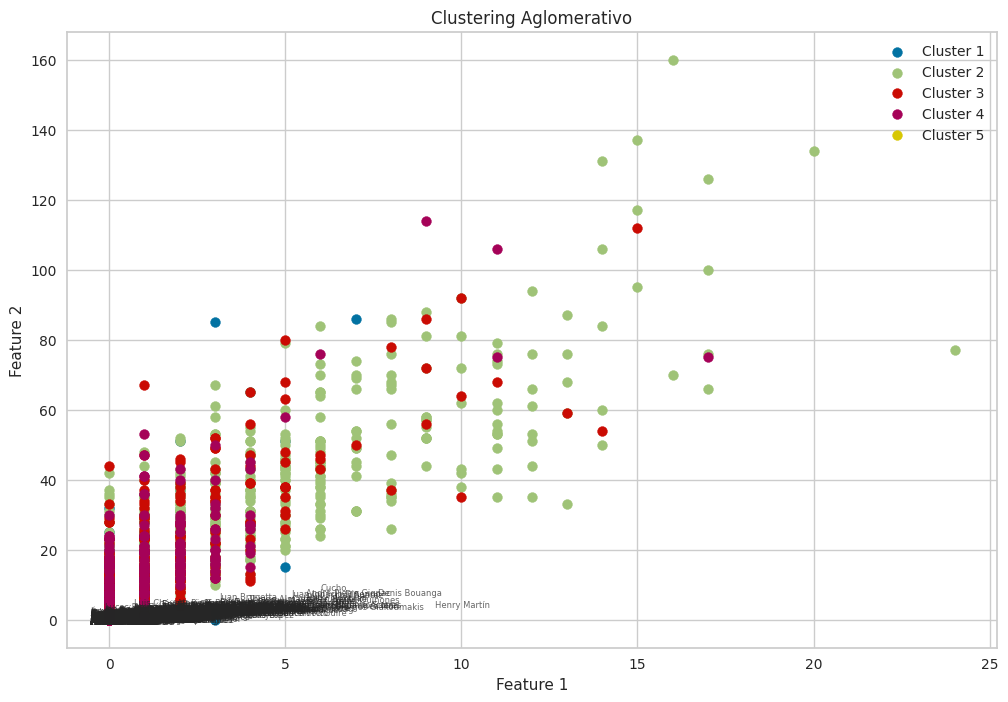

In [420]:
model = AgglomerativeClustering(n_clusters = 4, linkage='ward')                                                                     # AgglomerativeClustering
labels = model.fit_predict(X)

plt.figure(figsize=(12, 8))


for i in range(5):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, label=f'Cluster {i+1}')


for index, row in dfx.iterrows():
    plt.annotate(row['Player'], (row[Est_selecionadas[0]], row[Est_selecionadas[1]]), fontsize=6, alpha=0.7)

plt.title('Clustering Aglomerativo')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [421]:
labels

array([1, 1, 1, ..., 1, 1, 1])

In [422]:
Xalt = df_F90s[Est_selecionadas]

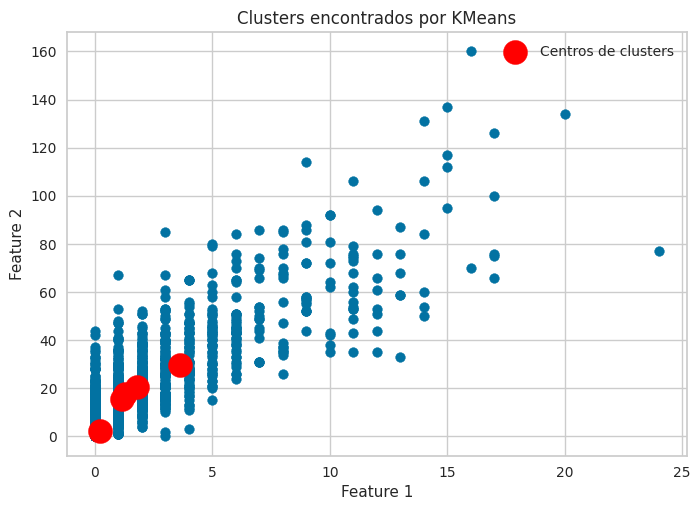

In [423]:
Xalt_np = Xalt.values                                                                                                                 # Kmeans

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(Xalt)


plt.scatter(Xalt_np[:, 0], Xalt_np[:, 1])


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', label='Centros de clusters')

plt.title('Clusters encontrados por KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

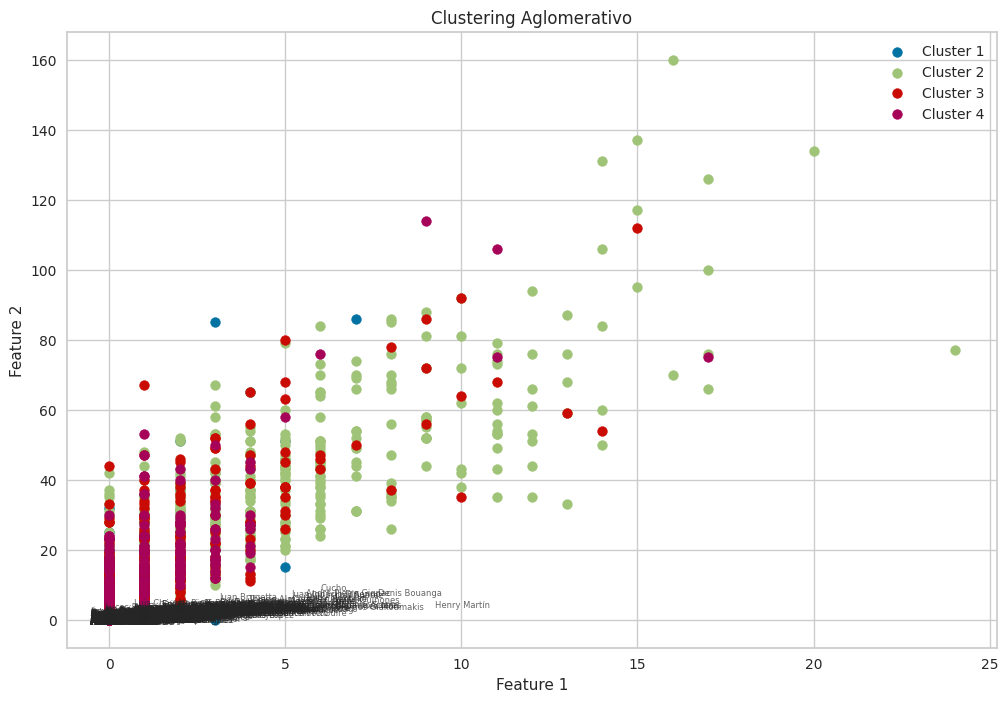

In [424]:

model = AgglomerativeClustering(n_clusters=4, linkage='ward')                                                                     # AgglomerativeClustering
labels = model.fit_predict(Xalt)

plt.figure(figsize=(12, 8))


for i in range(4):
    plt.scatter(Xalt.values[labels == i, 0], Xalt.values[labels == i, 1], s=50, label=f'Cluster {i+1}')


for index, row in dfx.iterrows():
    plt.annotate(row['Player'], (row[Est_selecionadas[0]], row[Est_selecionadas[1]]), fontsize=6, alpha=0.7)


plt.title('Clustering Aglomerativo')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [425]:
df_clustering = dfx[Est_selecionadas]

In [426]:
Xalt1 = df_clustering

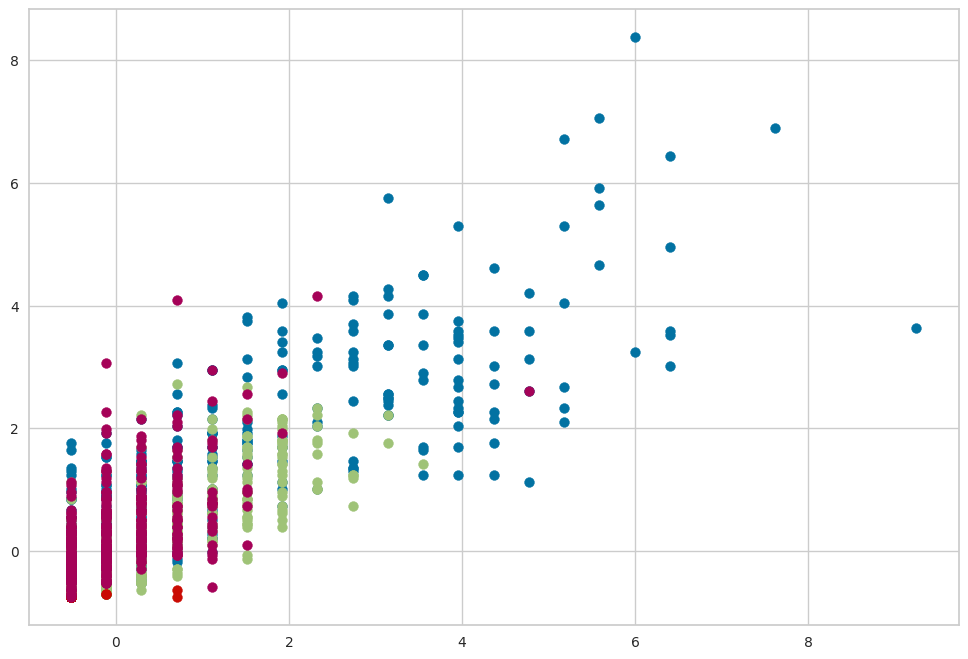

In [427]:

model = AgglomerativeClustering(n_clusters=4, linkage='ward')                                                                 # AgglomerativeClustering
labels = model.fit_predict(Xalt1)

plt.figure(figsize=(12, 8))


for i in range(4):
    plt.scatter(Xalt1.values[labels == i, 0], Xalt1.values[labels == i, 1], s=50, label=f'Cluster {i+1}')

In [428]:
df_clustering['Cluster'] = pd.DataFrame(labels)
df_clustering.head()

shooting_Gls  shooting_Sh  passing_Cmp  passing_PrgDist  passing_types_Att  \
0      1.922588     0.898568    -0.430891        -0.637118          -0.358145   
1      0.701342     0.955631     0.747628         0.305510           0.790159   
2     -0.519905     0.042625    -0.156694        -0.298050          -0.079703   
3     -0.519905    -0.642130    -0.842186        -0.651913          -0.895603   
4     -0.519905     0.270877     0.995460         0.634011           0.949886   

   passing_types_Live  possession_Def Pen  possession_Mid 3rd  \
0           -0.353555           -0.347362           -0.311723   
1            0.984008           -0.237641            1.428837   
2           -0.161789           -0.422795           -0.014723   
3           -0.868924           -0.230783           -0.857375   
4            1.118244           -0.066202            1.446105   

   defense_Def 3rd  defense_Mid 3rd  misc_TklW  misc_Crs  Cluster  
0        -0.837672        -0.634890  -0.584561 -0.487689      1.0  
1         0.762332         2.387745   1.640728  0.032393      0.0  
2        -0.437671         0.090542  -0.242209  1.867975      0.0  
3        -0.437671        -0.876701  -0.670149 -0.579468      1.0  
4         1.262333         0.815975   1.555140 -0.242945      3.0

In [429]:
df_clustering['Player'] = dfx['Player']

In [430]:
from google.colab import files


df_clustering.to_csv('df_clustering.csv', index=False)


files.download('df_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [431]:
df_clustering

shooting_Gls  shooting_Sh  passing_Cmp  passing_PrgDist  \
0         1.922588     0.898568    -0.430891        -0.637118   
1         0.701342     0.955631     0.747628         0.305510   
2        -0.519905     0.042625    -0.156694        -0.298050   
3        -0.519905    -0.642130    -0.842186        -0.651913   
4        -0.519905     0.270877     0.995460         0.634011   
...            ...          ...          ...              ...   
3007     -0.519905    -0.756255    -0.992467        -0.808011   
3010     -0.519905    -0.356815     0.671169        -0.026614   
3011     -0.519905    -0.756255    -0.992467        -0.808011   
3012      2.736752     2.439266     0.955912         0.232745   
3013      0.294260     1.126820    -0.676086        -0.724376   

      passing_types_Att  passing_types_Live  possession_Def Pen  \
0             -0.358145           -0.353555           -0.347362   
1              0.790159            0.984008           -0.237641   
2             -0.079703           -0.161789           -0.422795   
3             -0.895603           -0.868924           -0.230783   
4              0.949886            1.118244           -0.066202   
...                 ...                 ...                 ...   
3007          -1.044538           -1.029527           -0.422795   
3010           0.615323            0.756287           -0.196495   
3011          -1.044538           -1.029527           -0.429653   
3012           0.990897            1.015170           -0.361077   
3013          -0.627954           -0.583673           -0.361077   

      possession_Mid 3rd  defense_Def 3rd  defense_Mid 3rd  misc_TklW  \
0              -0.311723        -0.837672        -0.634890  -0.584561   
1               1.428837         0.762332         2.387745   1.640728   
2              -0.014723        -0.437671         0.090542  -0.242209   
3              -0.857375        -0.437671        -0.876701  -0.670149   
4               1.446105         1.262333         0.815975   1.555140   
...                  ...              ...              ...        ...   
3007           -0.950619        -0.837672        -0.634890  -0.755737   
3010            1.235441         0.062330         1.541407   0.613671   
3011           -0.954073        -0.837672        -0.755795  -0.926913   
3012            0.917720         0.362331         1.420502   1.298376   
3013           -0.512026        -0.837672        -0.755795  -0.755737   

      misc_Crs  Cluster              Player  
0    -0.487689      1.0         Ramón Ábila  
1     0.032393      0.0      Gonzalo Abrego  
2     1.867975      0.0       Jonás Acevedo  
3    -0.579468      1.0       Lucas Acevedo  
4    -0.242945      3.0    Guillermo Acosta  
...        ...      ...                 ...  
3007 -0.579468      NaN        Paolo Yrizar  
3010 -0.273538      NaN      Edgar Zaldívar  
3011 -0.579468      NaN        Ángel Zapata  
3012  2.173905      NaN  Alejandro Zendejas  
3013 -0.304131      NaN         José Zúñiga  

[2652 rows x 14 columns]

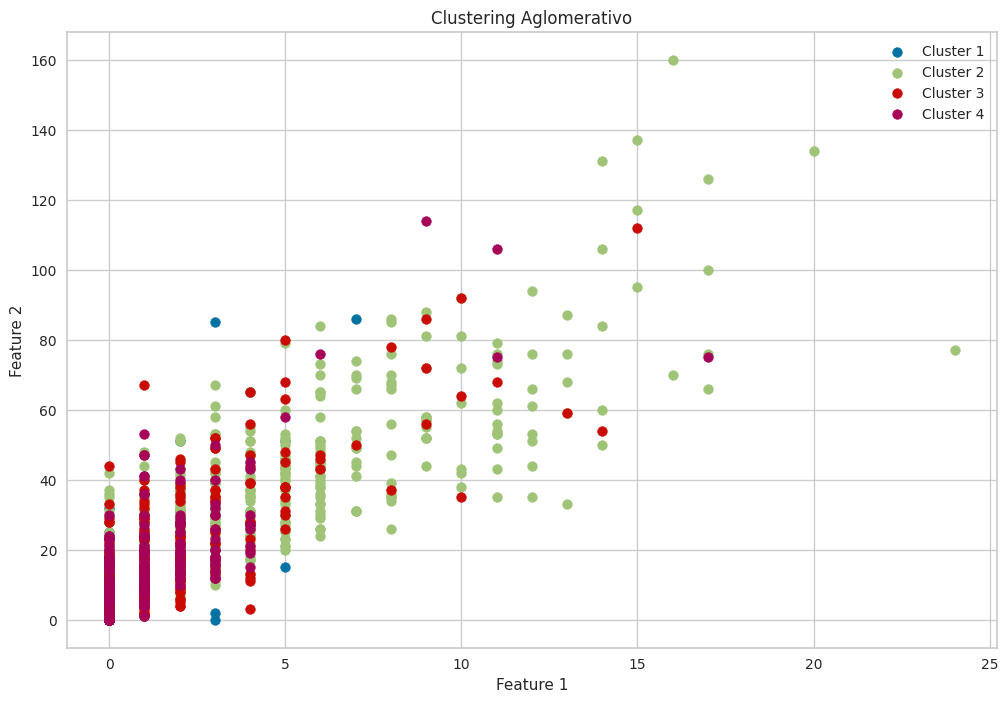

In [432]:
                                                                                        # AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = model.fit_predict(X)


plt.figure(figsize=(12, 8))


for i in range(4):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, label=f'Cluster {i+1}')


plt.title('Clustering Aglomerativo')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

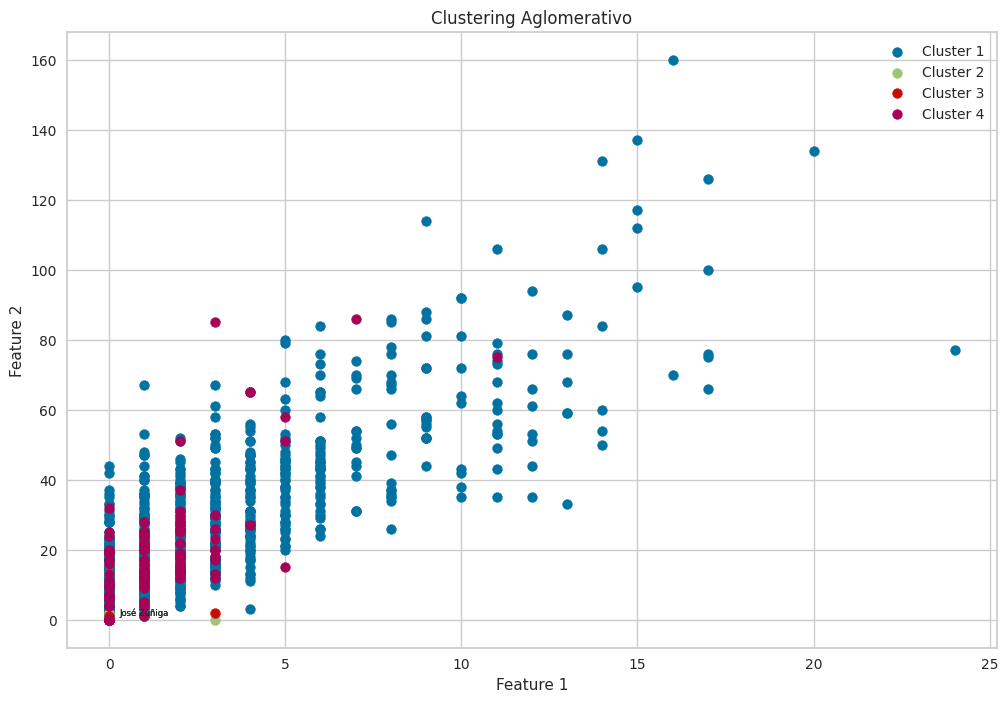

In [433]:
model = AgglomerativeClustering(n_clusters = 4, linkage='average')                                                             # AgglomerativeClustering
labels = model.fit_predict(X)

plt.figure(figsize=(12, 8))


for i in range(4):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, label=f'Cluster {i+1}')


    plt.annotate(row['Player'], (row[Est_selecionadas[0]], row[Est_selecionadas[1]]), fontsize=6, alpha=0.7)

plt.title('Clustering Aglomerativo')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

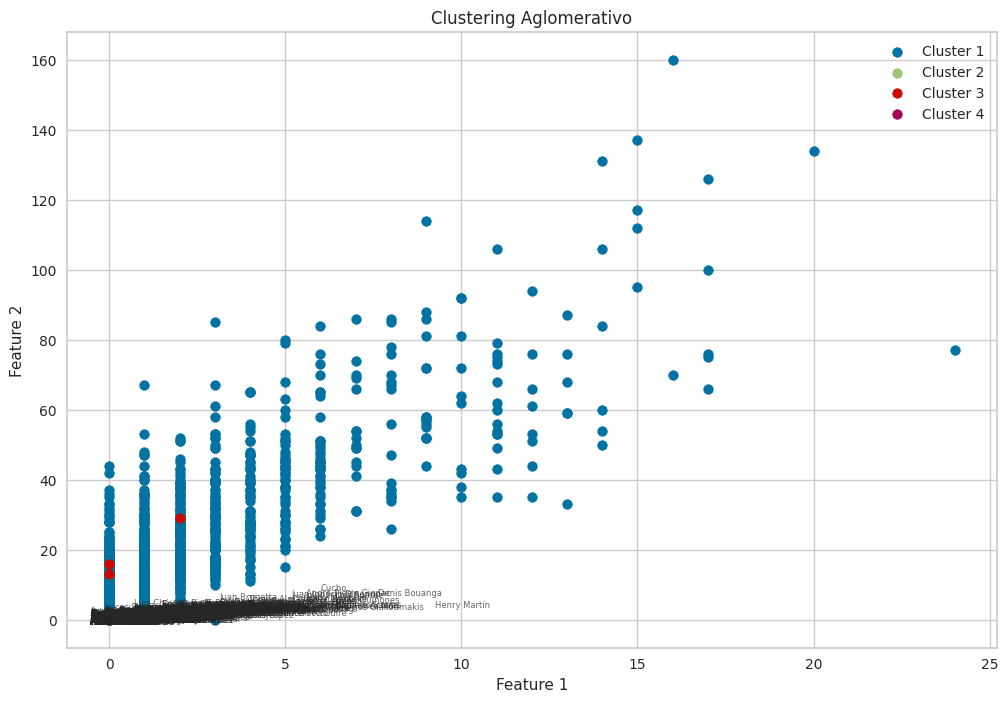

In [434]:
model = AgglomerativeClustering(n_clusters = 4, linkage='single')                                                             #AgglomerativeClustering
labels = model.fit_predict(X)

plt.figure(figsize=(12, 8))


for i in range(4):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, label=f'Cluster {i+1}')


for index, row in dfx.iterrows():
    plt.annotate(row['Player'], (row[Est_selecionadas[0]], row[Est_selecionadas[1]]), fontsize=6, alpha=0.7)

plt.title('Clustering Aglomerativo')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

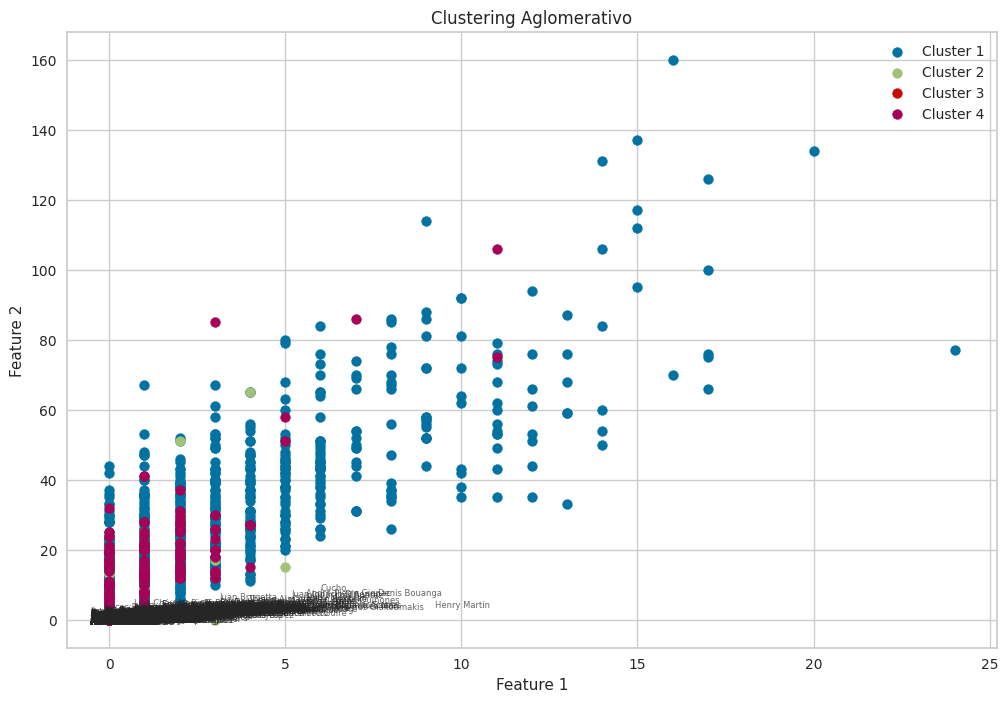

In [435]:
model = AgglomerativeClustering(n_clusters = 4, linkage='complete')                                                             #AgglomerativeClustering
labels = model.fit_predict(X)

plt.figure(figsize=(12, 8))


for i in range(4):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, label=f'Cluster {i+1}')


for index, row in dfx.iterrows():
    plt.annotate(row['Player'], (row[Est_selecionadas[0]], row[Est_selecionadas[1]]), fontsize=6, alpha=0.7)

plt.title('Clustering Aglomerativo')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

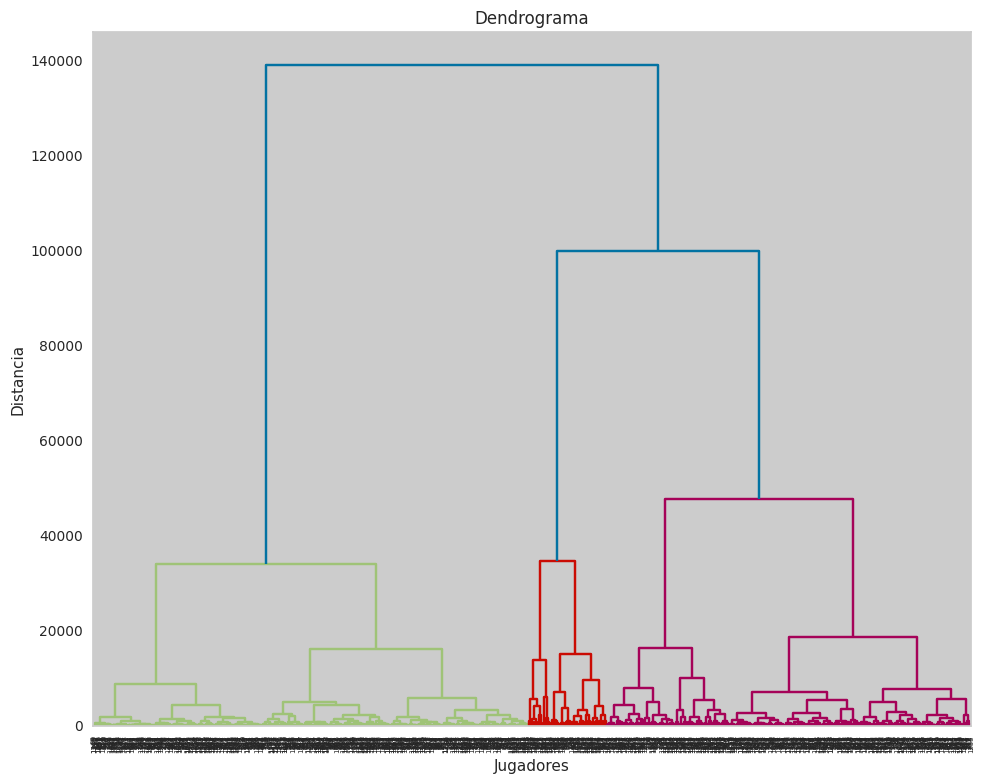

In [436]:
plt.figure(figsize=(10, 8))                                                                                                       #Dendrograma

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))


plt.title('Dendrograma')
plt.xlabel('Jugadores')
plt.ylabel('Distancia')
plt.tight_layout()
plt.show()

#. clusters estimado: 1
# puntos ruidosos: 1362


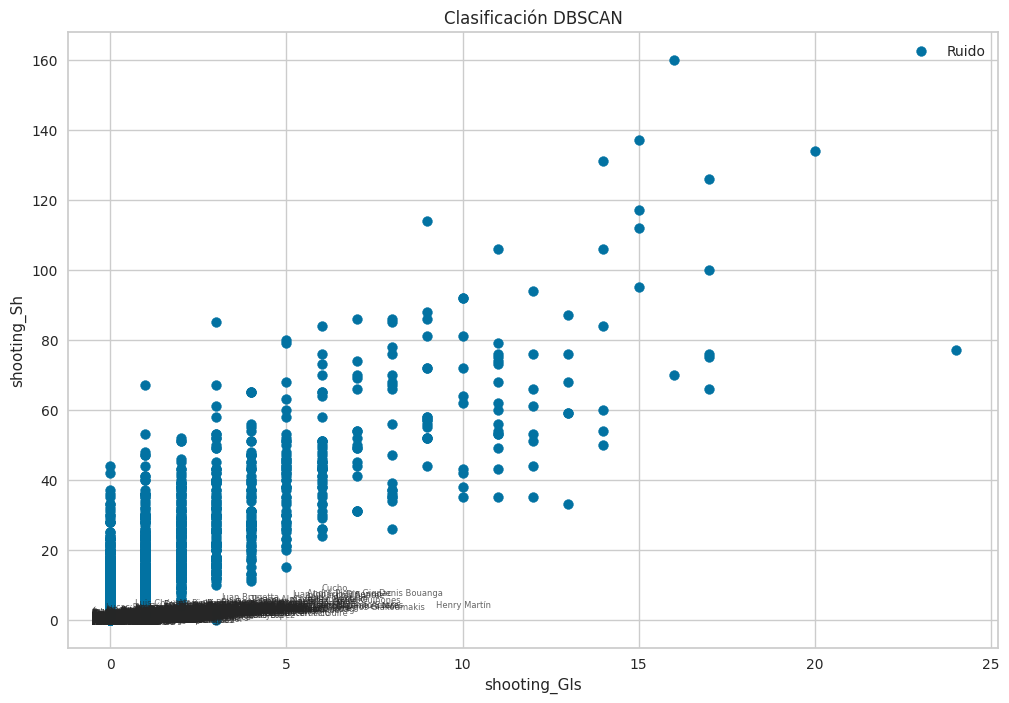

In [437]:
epsilon = 2
min_samples = 2
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_


no_clusters = len(np.unique(labels))
no_noise = np.sum(labels == -1)
print('#. clusters estimado:', no_clusters)
print('# puntos ruidosos:', no_noise)


plt.figure(figsize=(12, 8))


for k in np.unique(labels):
    mask = (labels == k)
    plt.scatter(X[mask, 0], X[mask, 1], s=50, label=f'Cluster {k}' if k != -1 else 'Ruido')


for i, row in dfx.iterrows():
    plt.annotate(row['Player'], (row[Est_selecionadas[0]], row[Est_selecionadas[1]]), fontsize=6, alpha=0.7)

plt.title('Clasificación DBSCAN')
plt.xlabel(Est_selecionadas[0])
plt.ylabel(Est_selecionadas[1])
plt.legend()
plt.show()

In [438]:
from yellowbrick.cluster import SilhouetteVisualizer

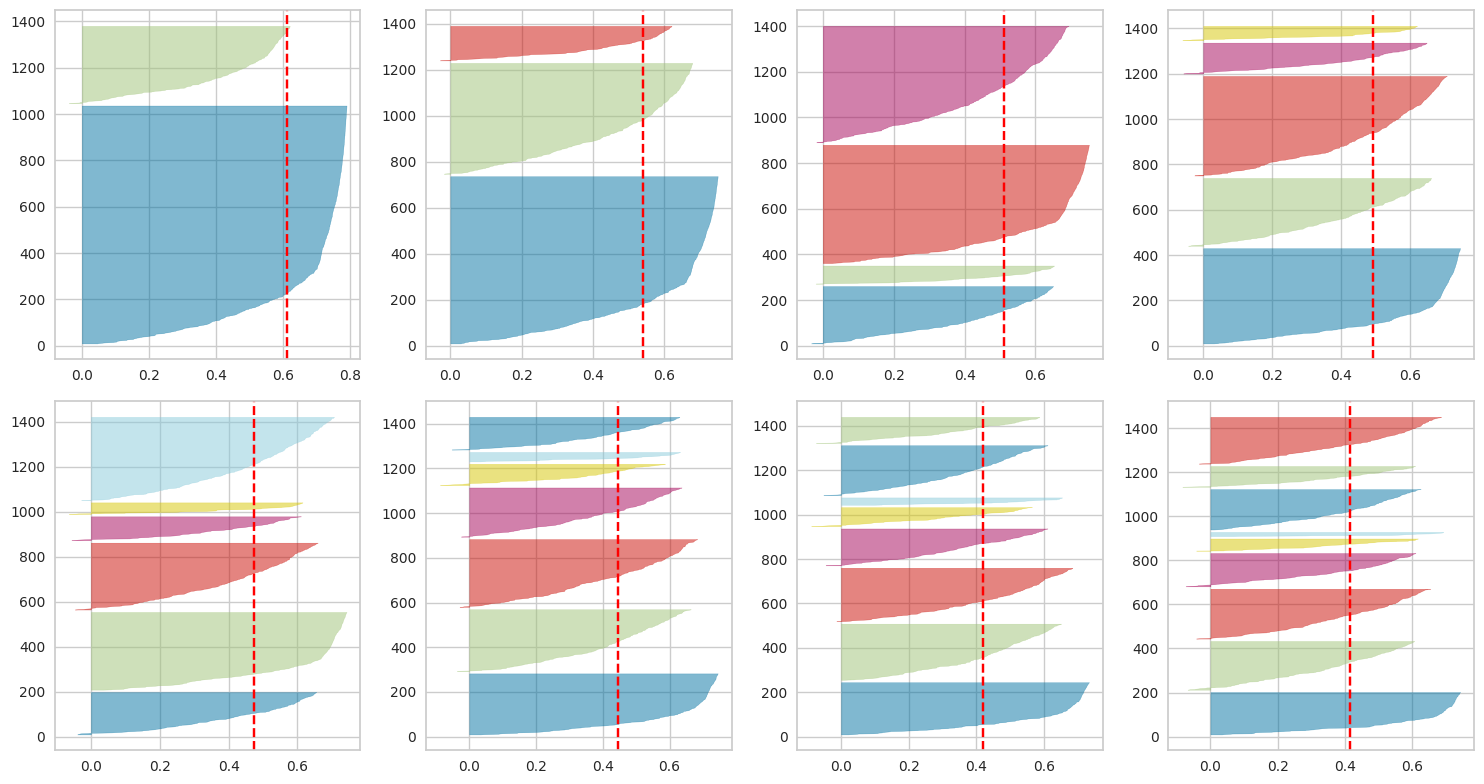

In [439]:
fig, ax = plt.subplots(2, 4, figsize=(15, 8))
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i - 2, 4)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(X)

plt.tight_layout()
plt.show()

In [440]:
X1 = df_F90s[Est_selecionadas].values

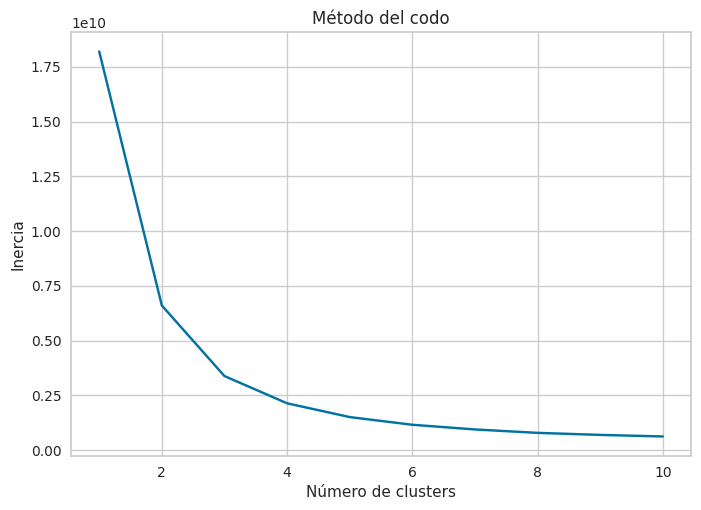

In [441]:
wcss = []                                                                                                    # wcss
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

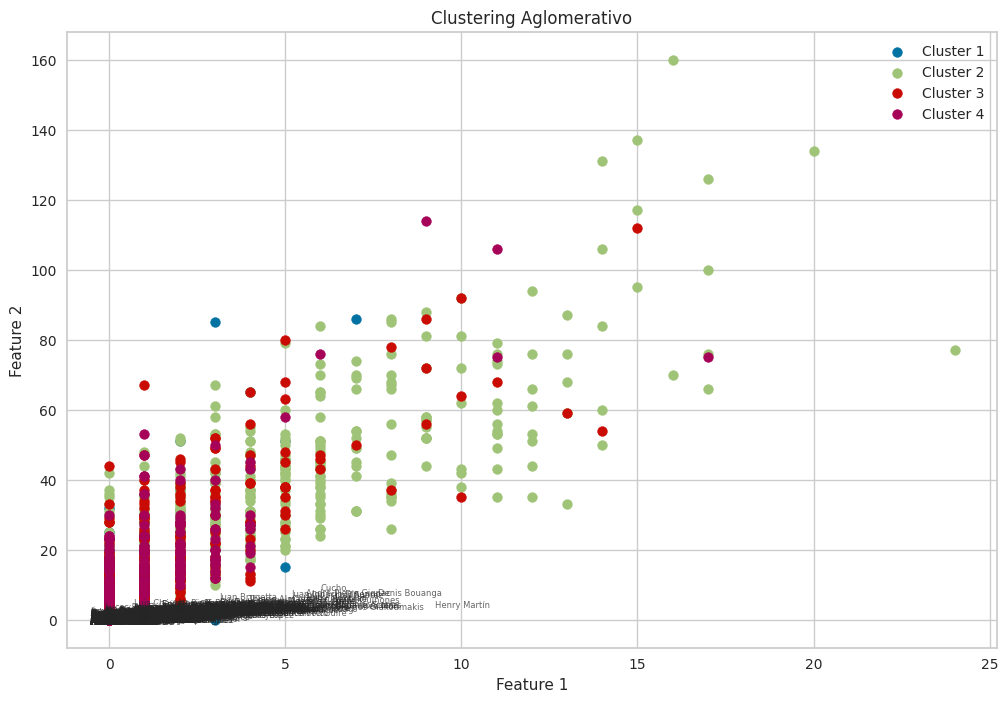

In [442]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward')                                                             # AgglomerativeClustering
labels = model.fit_predict(X1)

plt.figure(figsize=(12, 8))


for i in range(4):
    plt.scatter(X1[labels == i, 0], X1[labels == i, 1], s=50, label=f'Cluster {i+1}')


for index, row in dfx.iterrows():
    plt.annotate(row['Player'], (row[Est_selecionadas[0]], row[Est_selecionadas[1]]), fontsize=6, alpha=0.7)

plt.title('Clustering Aglomerativo')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

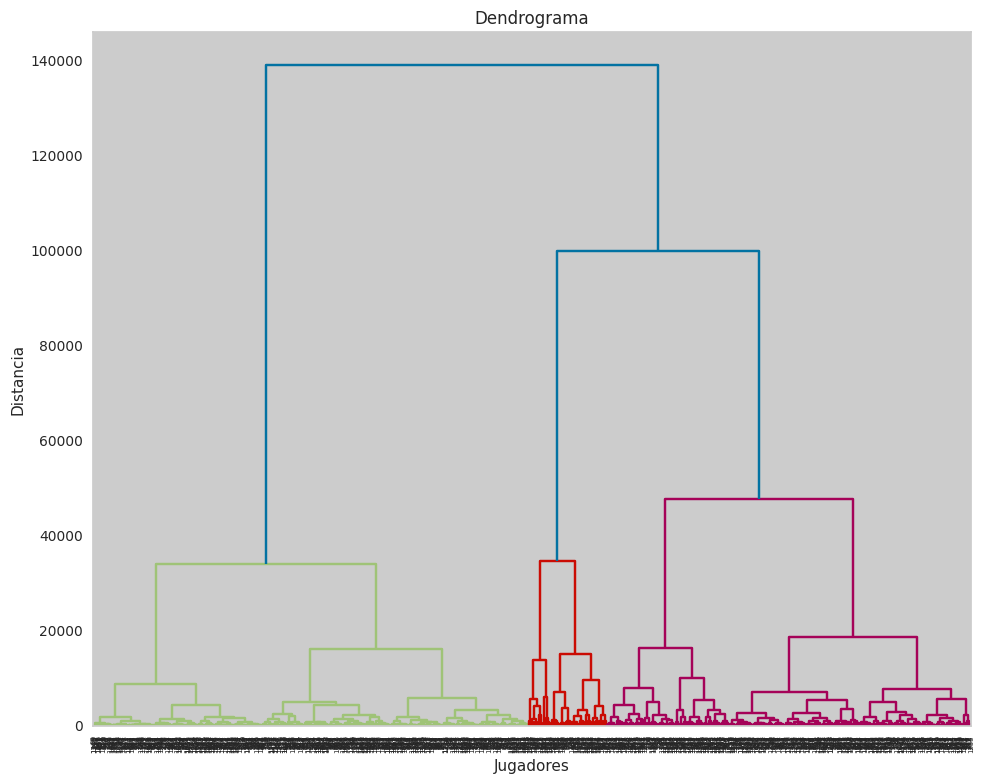

In [443]:
plt.figure(figsize=(10, 8))                                                                                                       # Dendrograma

dendrogram = sch.dendrogram(sch.linkage(X1, method='ward'))


plt.title('Dendrograma')
plt.xlabel('Jugadores')
plt.ylabel('Distancia')
plt.tight_layout()
plt.show()

#. clusters estimado: 1
# puntos ruidosos: 1362


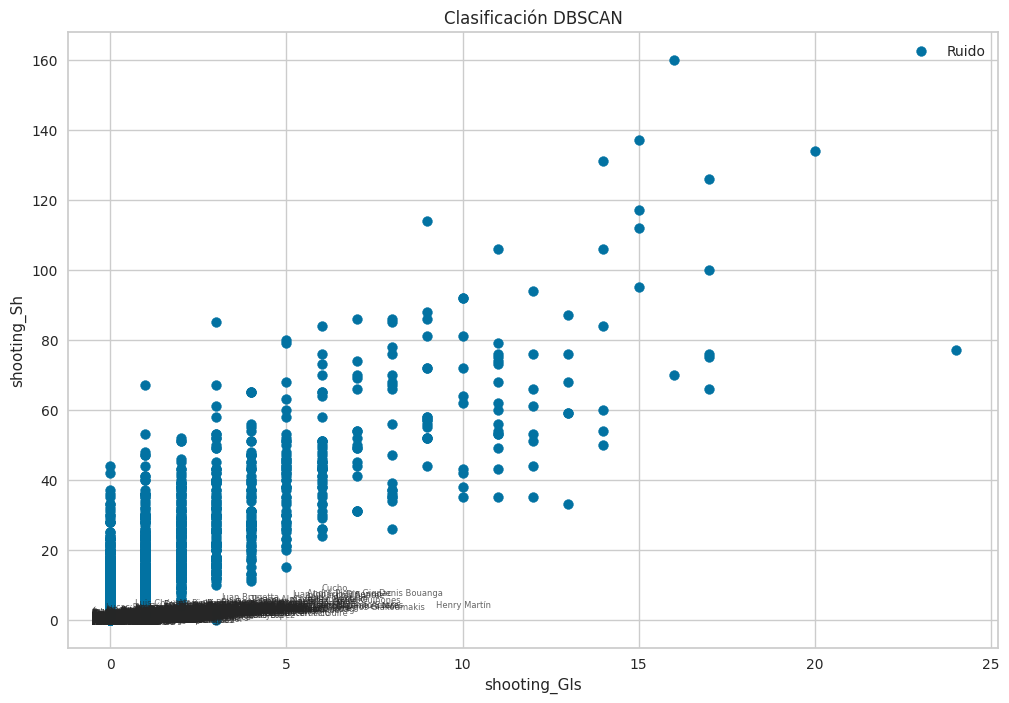

In [444]:
                                                                                                                  # DBSCAN
epsilon = 2
min_samples = 2
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X1)
labels = db.labels_

no_clusters = len(np.unique(labels))
no_noise = np.sum(labels == -1)
print('#. clusters estimado:', no_clusters)
print('# puntos ruidosos:', no_noise)

plt.figure(figsize=(12, 8))


for k in np.unique(labels):
    mask = (labels == k)
    plt.scatter(X1[mask, 0], X1[mask, 1], s=50, label=f'Cluster {k}' if k != -1 else 'Ruido')


for i, row in dfx.iterrows():
    plt.annotate(row['Player'], (row[Est_selecionadas[0]], row[Est_selecionadas[1]]), fontsize=6, alpha=0.7)

plt.title('Clasificación DBSCAN')
plt.xlabel(Est_selecionadas[0])
plt.ylabel(Est_selecionadas[1])
plt.legend()
plt.show()

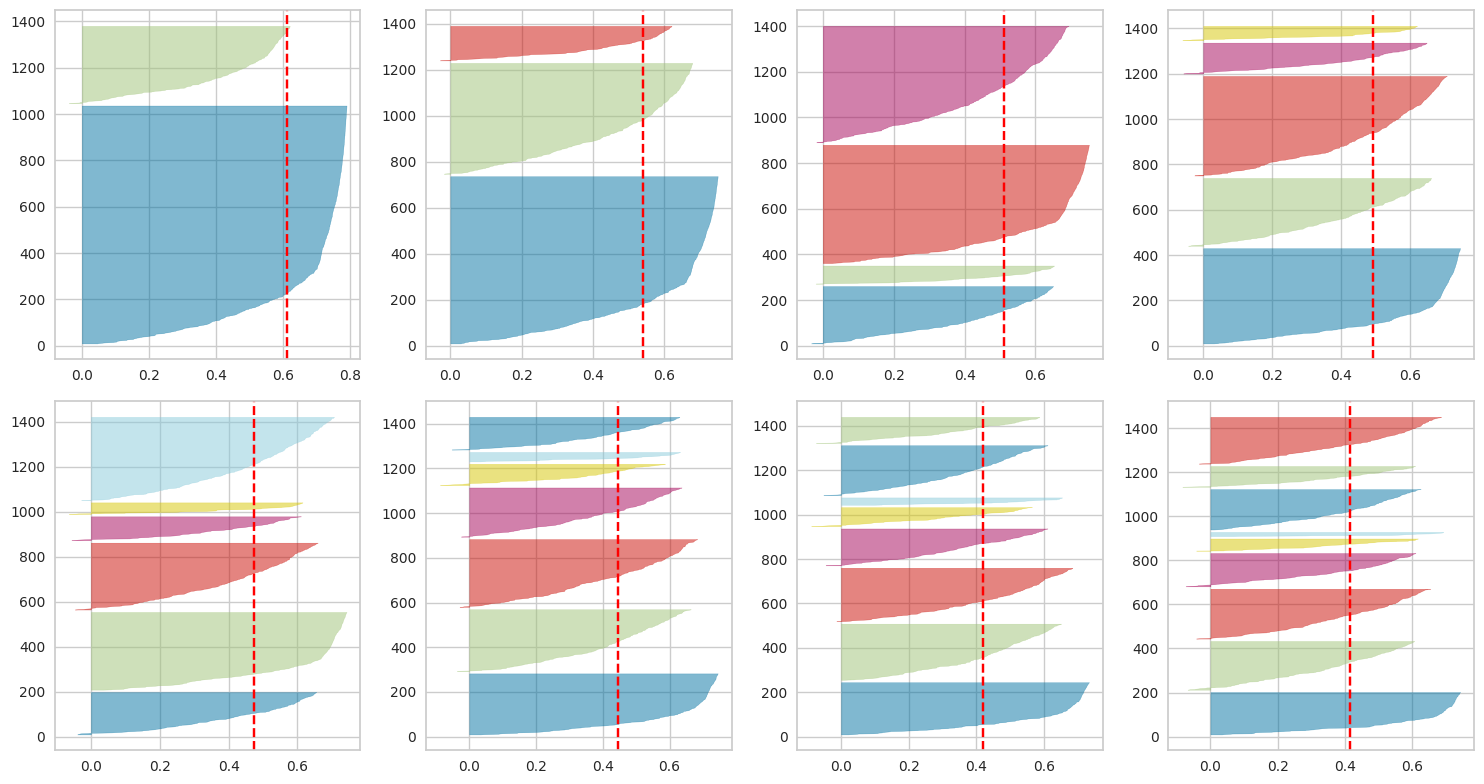

In [445]:
fig, ax = plt.subplots(2, 4, figsize=(15, 8))
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i - 2, 4)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(X1)

plt.tight_layout()
plt.show()

In [446]:
X2 = df_F90s[Est_selecionadas]

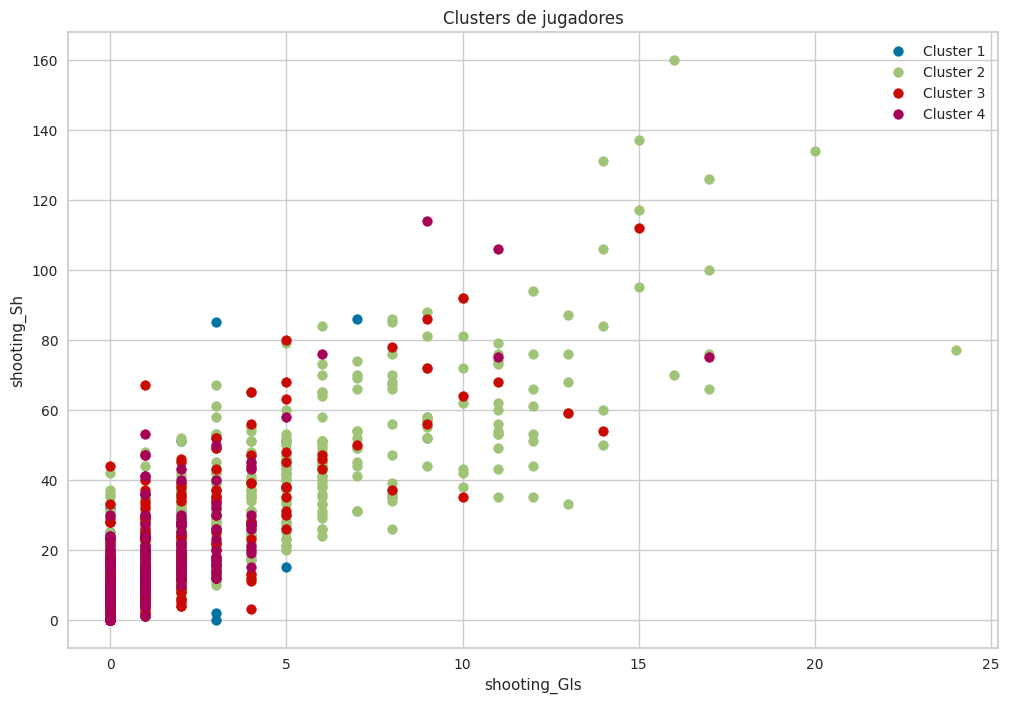

In [447]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward')                                                             # AgglomerativeClustering
labels = model.fit_predict(X2)

plt.figure(figsize=(12, 8))

for i in range(4):
    cluster_data = X2[labels == i]
    plt.scatter(cluster_data[Est_selecionadas[0]], cluster_data[Est_selecionadas[1]], s=50, label=f'Cluster {i+1}')

plt.xlabel(Est_selecionadas[0])
plt.ylabel(Est_selecionadas[1])
plt.title('Clusters de jugadores')
plt.legend()
plt.show()

In [448]:

df_filtrado = df_F90s[Est_selecionadas].copy()
df_filtrado['Player'] = df_F90s['Player'].values
df_filtrado['stats_Pos'] = df_F90s['stats_Pos'].values
df_filtrado['cluster'] = labels


df_resultado = df_filtrado[['Player', 'stats_Pos', 'cluster']]
print(df_resultado.head())

             Player stats_Pos  cluster
0       Ramón Ábila        FW        1
1    Gonzalo Abrego        MF        1
2     Jonás Acevedo     MF,FW        1
4  Guillermo Acosta        MF        2
5    Lautaro Acosta        MF        1


In [449]:
df_filtrado.to_csv('df_filtrado.csv', index=False)

files.download('df_filtrado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [450]:
df_resultado['cluster'].value_counts()

cluster
1    676
2    375
3    190
0    121
Name: count, dtype: int64

In [451]:
pd.crosstab(df_resultado['cluster'], df_resultado['stats_Pos'])

stats_Pos   DF  DF,FW  DF,MF   FW  FW,DF  FW,MF  GK   MF  MF,DF  MF,FW
cluster                                                               
0           47      0      1    0      0      0  63    8      1      1
1           97      8     30  145      6    131   4  143     14     98
2          211      6     18    1      0      6  13   86     10     24
3          117      1      4    0      0      0  30   31      3      4

Gettings player percentiles...
Starting to plot...


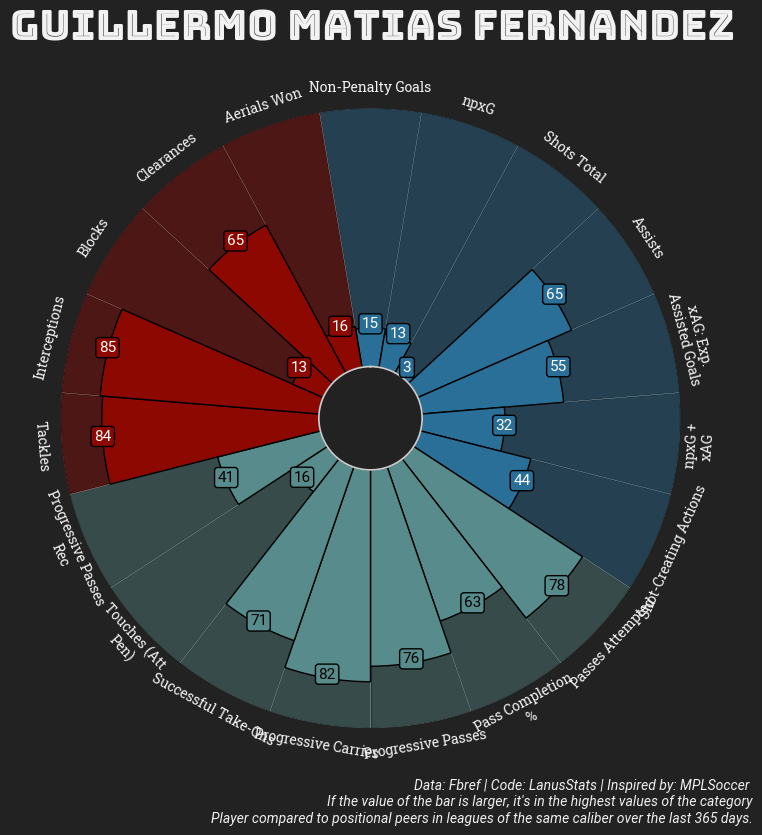

In [452]:
ls.visualizations.fbref_plot_player_percentiles('https://fbref.com/en/players/24377e64/Guillermo-Matias-Fernandez')                # Esta visualizacion era la que pensaba usar para graficar en caso de tener candidatos claros.

#Consideraciones finales

Algunas consideraciones finales, a la hora de seleccionar las estadisticas se buscan los aspectos del juego que tendrian que dominar los jugadores para la determinada posicion tactica, para este caso se trataba de volante central siendo a grandes rasgos la tenencia de la pelota, la distribucion correcta del juego asi como tambien acciones defensivas como tackles todo para el sector defensivo mas bien externo (zona de ejecucion de penales mas o menos), el sector medio de la cancha mas bien centrado y con apariciones en zona de ataque inicial para cubrir espacios o buscar rebotes por ejemplo.
Con respecto a las ligas seleccionadas en principio se seleccionan lo mejor a lo que puede aspirar el poder economico del club en cuesion, por eso ligas como las Europeas no son target. Si podrian serlo ligas de Latinoamerica, Africa, inclusive hoy en dia Asia. En mi caso en un principio tenia incluidas otras ligas de Latinoamerica pero la falta de algunas estadisticas importantes para esos torneos me llevo dejarlas de lado.

##Conclusion

La conclusion es que en principio al dia de hoy no es posible detectar el mejor, ni siquiera un rango de mejores, jugadores para ser refuerzo de una plantilla determinada usando algoritmos no supervisados de machine learning.
Principalmente porque en caso de lograr configurar alguno de los algoritmos para que clasifique de forma correcta todos los jugadores, a pesar de eso no me estaria brindando informacion sobre cual de todos ellos es mejor o mas indicado.Esto al menos con la informacion que se brindo en el curso no encontre una forma correcta.
Por otro lado con respecto al funcionamiento de los modelos testeados el AgglomerativeClustering es el que da los mejores resultados. Pero a la hora de hacer una analisis de los diferentes clusters que determina nos encontramos con situaciones como los arqueros repartidos en diferentes clusters. Siendo este ultimo el ejemplo mas grosero pero no el unico. Osea, si bien agrupa relativamente bien un gran numero de jugadores por su posicion el resultado final no es bueno porque otros quedan muchos quedan mesclados.

##Posibles mejoras

Se podrian tomar diferentes combinaciones de las features para correr todos los algoritmos, ademas se pueden tocar algunos otros hiperparametros y configuraciones como por ejemplo correr los algoritmos con 5 clusters de ser posible ya que tanto la tecnica del codo como el score de la silueta parecen indicar que son posibles.
Tambien enriqueser el data set con mas temporadas para sumar mas datos y quizas mas jugadores tambien porque por ejemplo el trato de los jugadores duplicados estuvo bastante precario mas que nada por cuestiones de tiempo.